In [1]:
# ─────────────────────────────────────────────
# 셀 1 : 라이브러리 로드 & 데이터 불러오기
# ─────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.dpi"] = 120

TRAIN_CSV = r"C:\Users\shaun\Desktop\project\Daycon\stress\train.csv"
TEST_CSV  = r"C:\Users\shaun\Desktop\project\Daycon\stress\test.csv"

train = pd.read_csv(TRAIN_CSV)
test  = pd.read_csv(TEST_CSV)

print(f"train.shape = {train.shape},   test.shape = {test.shape}")
train.head()


train.shape = (3000, 18),   test.shape = (3000, 17)


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [2]:
# ─────────────────────────────────────────────
# 셀 2 : 데이터 타입·결측치 비율·기본 통계
# ─────────────────────────────────────────────
def missing_ratio(df):
    return (df.isna().mean()*100).round(2).rename("%missing")

info = pd.DataFrame({
    "dtype"     : train.dtypes,
    "%missing"  : missing_ratio(train),
    "n_unique"  : train.nunique()
})
display(info.sort_values("%missing", ascending=False))

# 수치형 기본 통계
display(train.describe().T)

# 범주형 빈도 상위 5개씩
cat_cols = train.select_dtypes("object").columns.drop(["ID"])
for col in cat_cols:
    print(f"\n▶ {col}")
    display(train[col].value_counts().head())


,dtype,%missing,n_unique
family_medical_history,object,49.53,3
medical_history,object,42.97,3
mean_working,float64,34.40,13
edu_level,object,20.23,3
ID,object,0.00,3000
gender,object,0.00,2
sleep_pattern,object,0.00,3
smoke_status,object,0.00,3
activity,object,0.00,3
bone_density,float64,0.00,200


,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00
stress_score,3000.0,0.482130,0.288252,0.00,0.2300,0.480,0.7300,1.00



▶ gender


gender
F    1508
M    1492
Name: count, dtype: int64


▶ activity


activity
moderate    1431
light        894
intense      675
Name: count, dtype: int64


▶ smoke_status


smoke_status
ex-smoker         1177
non-smoker        1039
current-smoker     784
Name: count, dtype: int64


▶ medical_history


medical_history
high blood pressure    697
heart disease          508
diabetes               506
Name: count, dtype: int64


▶ family_medical_history


family_medical_history
diabetes               615
high blood pressure    480
heart disease          419
Name: count, dtype: int64


▶ sleep_pattern


sleep_pattern
normal              1557
sleep difficulty    1019
oversleeping         424
Name: count, dtype: int64


▶ edu_level


edu_level
high school diploma    924
bachelors degree       880
graduate degree        589
Name: count, dtype: int64

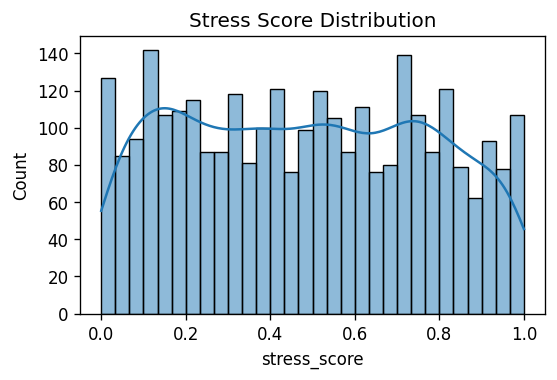

count    3000.000000
mean        0.482130
std         0.288252
min         0.000000
25%         0.230000
50%         0.480000
75%         0.730000
max         1.000000
Name: stress_score, dtype: float64


In [3]:
# ─────────────────────────────────────────────
# 셀 3 : 타깃(stress_score) 분포 확인
# ─────────────────────────────────────────────
plt.figure(figsize=(5,3))
sns.histplot(train["stress_score"], kde=True, bins=30)
plt.title("Stress Score Distribution")
plt.show()

print(train["stress_score"].describe())


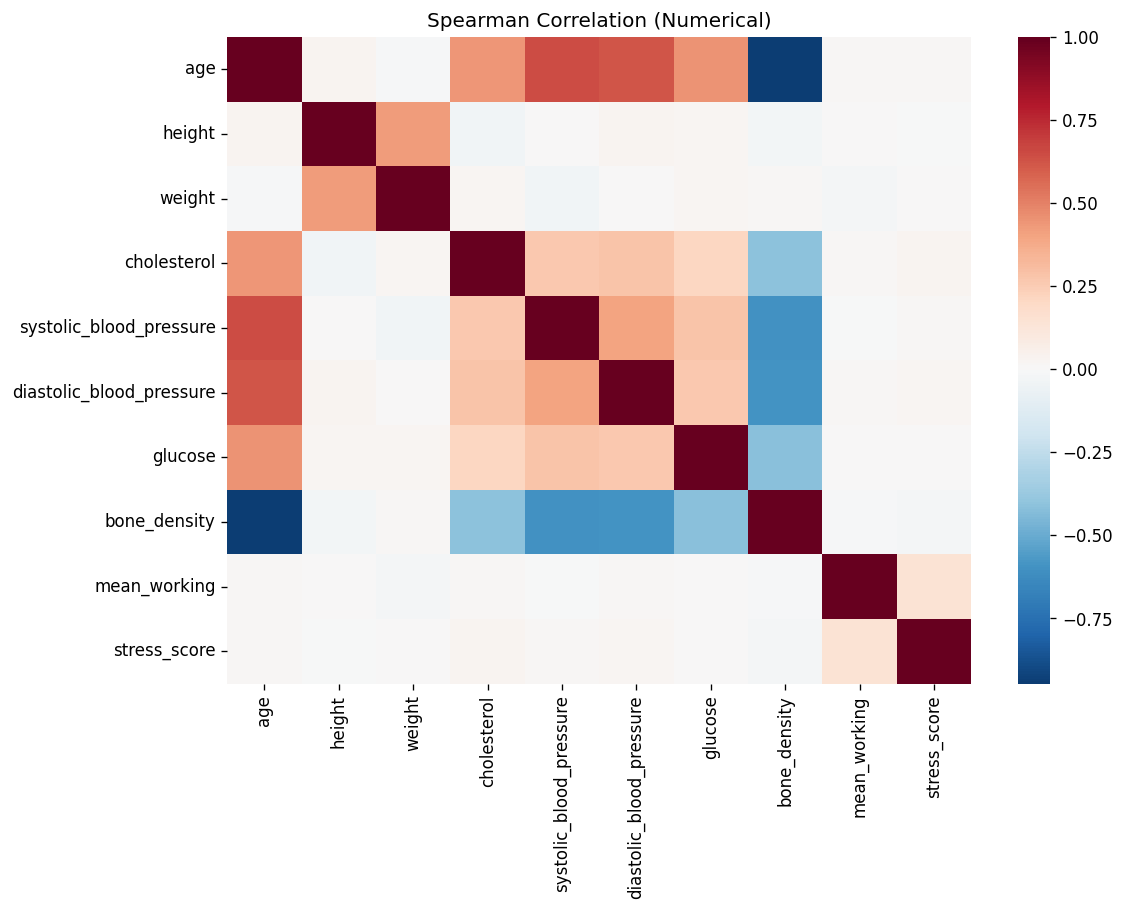

stress_score                1.000000
mean_working                0.145073
cholesterol                 0.026804
diastolic_blood_pressure    0.019255
age                         0.019001
systolic_blood_pressure     0.017789
weight                      0.007825
glucose                    -0.003056
height                     -0.010767
bone_density               -0.022841
Name: stress_score, dtype: float64

In [4]:
# ─────────────────────────────────────────────
# 셀 4 : 수치형 ↔ 타깃 간 상관관계
# ─────────────────────────────────────────────
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")

corr = train[num_cols.tolist() + ["stress_score"]].corr(method="spearman")
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=False, cmap="RdBu_r", center=0)
plt.title("Spearman Correlation (Numerical)")
plt.show()

corr["stress_score"].sort_values(ascending=False)


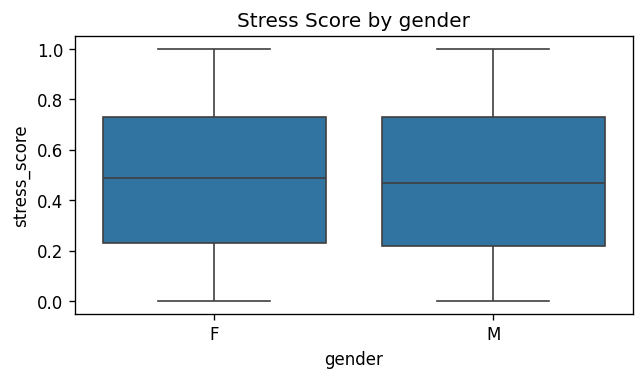

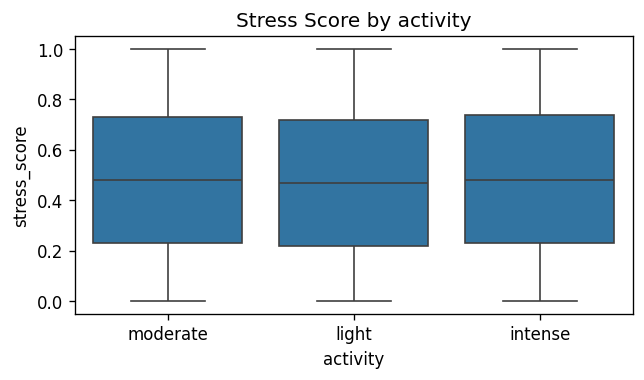

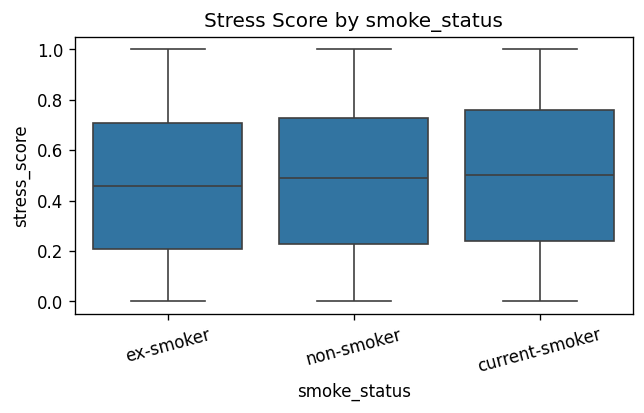

In [5]:
# ─────────────────────────────────────────────
# 셀 5 : 범주형 ↔ 타깃 관계 (boxplot 예시)
# ─────────────────────────────────────────────
def cat_box(col, rotate=0):
    plt.figure(figsize=(6,3))
    sns.boxplot(data=train, x=col, y="stress_score")
    plt.title(f"Stress Score by {col}")
    plt.xticks(rotation=rotate)
    plt.show()

cat_box("gender")
cat_box("activity")
cat_box("smoke_status", rotate=15)


<Figure size 1200x480 with 0 Axes>

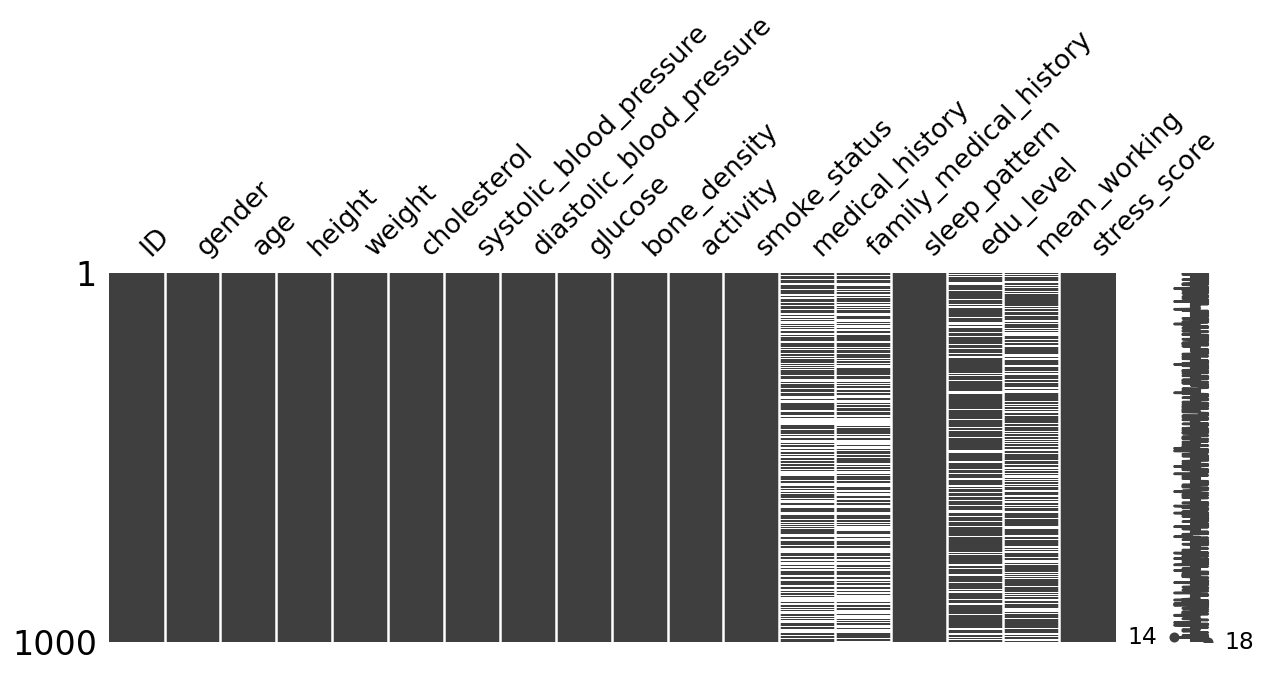

<Figure size 720x360 with 0 Axes>

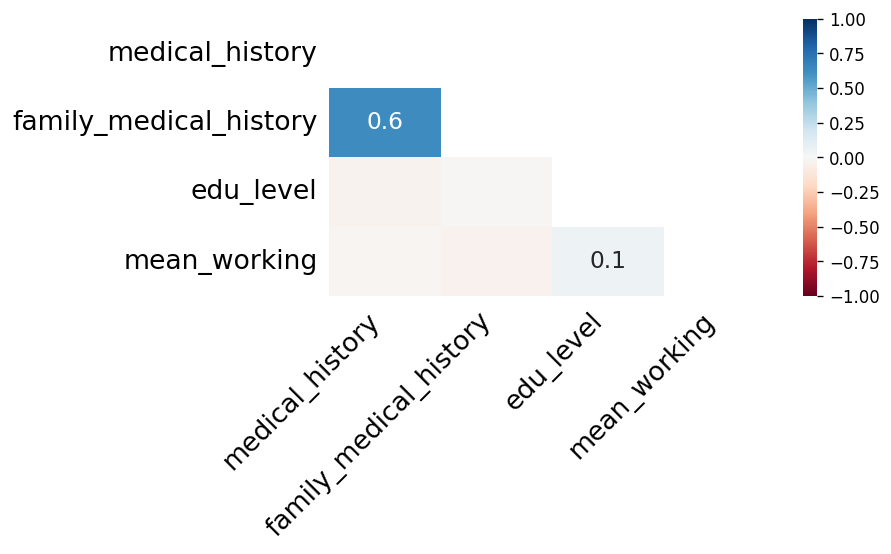

In [6]:
# ─────────────────────────────────────────────
# 셀 6 : 결측치 패턴 시각화 (옵션)
# ─────────────────────────────────────────────
import missingno as msno

plt.figure(figsize=(10,4))
msno.matrix(train.sample(1000), figsize=(12,4))
plt.show()

plt.figure(figsize=(6,3))
msno.heatmap(train, figsize=(6,3))
plt.show()


In [7]:
# ─────────────────────────────────────────────
# 셀 7 : 간단한 파생 변수 예시 (BMI, 맥압)
# ─────────────────────────────────────────────
def add_features(df):
    df["BMI"] = df["weight"] / (df["height"]/100)**2
    df["pulse_pressure"] = df["systolic_blood_pressure"] - df["diastolic_blood_pressure"]
    return df

train = add_features(train)
test  = add_features(test)

train[["BMI","pulse_pressure","stress_score"]].describe().T


,count,mean,std,min,25%,50%,75%,max
BMI,3000.0,25.533747,4.360648,12.092013,22.365543,25.332612,28.361285,43.388951
pulse_pressure,3000.0,50.640333,14.962406,8.000000,41.000000,51.000000,61.000000,97.000000
stress_score,3000.0,0.482130,0.288252,0.000000,0.230000,0.480000,0.730000,1.000000


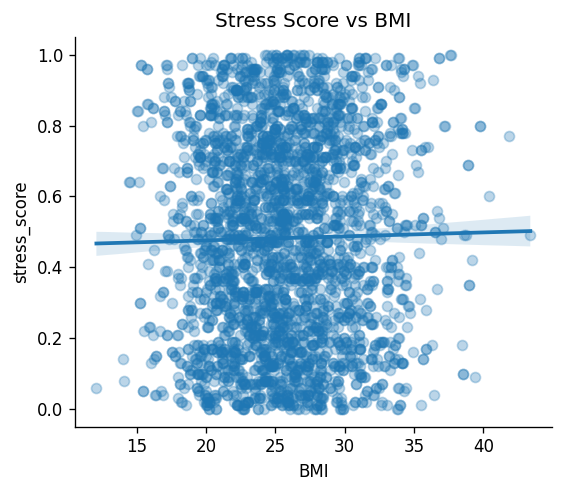

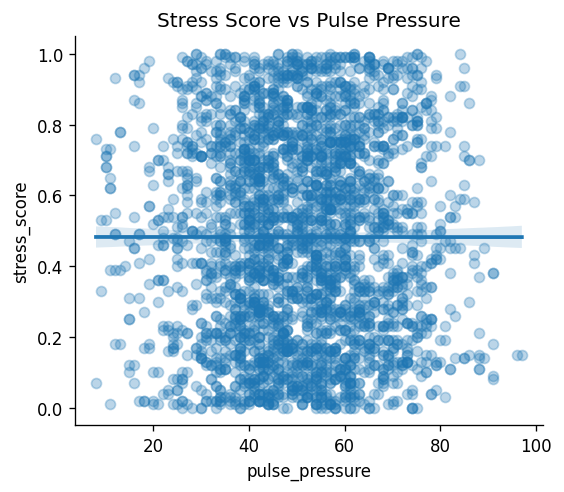

In [8]:
# ─────────────────────────────────────────────
# 셀 8 : 파생 변수 ↔ 타깃 관계 빠르게 확인
# ─────────────────────────────────────────────
sns.lmplot(data=train, x="BMI", y="stress_score", height=4, aspect=1.2, scatter_kws=dict(alpha=0.3))
plt.title("Stress Score vs BMI")
plt.show()

sns.lmplot(data=train, x="pulse_pressure", y="stress_score", height=4, aspect=1.2, scatter_kws=dict(alpha=0.3))
plt.title("Stress Score vs Pulse Pressure")
plt.show()


In [9]:
# ─────────────────────────────────────────────
# 셀 9 : 범주형 라벨 인코딩/원-핫 준비 (스케치)
# ─────────────────────────────────────────────
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")
cat_cols = train.select_dtypes("object").columns.drop(["ID"])

preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# 이후 모델 파이프라인에 preprocess를 넣어주면 됩니다.


In [10]:
# ─────────────────────────────────────────────
# 셀 10 : 간단 베이스라인 (ElasticNetCV 예시)
# ─────────────────────────────────────────────
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

X = train.drop(columns=["stress_score"])
y = train["stress_score"]

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = make_pipeline(preprocess,
                      ElasticNetCV(cv=5, l1_ratio=[.1,.5,.9], random_state=42))
                  
rmse_scores = []
for tr_idx, vl_idx in cv.split(X):
    model.fit(X.iloc[tr_idx], y.iloc[tr_idx])
    pred = model.predict(X.iloc[vl_idx])
    rmse_scores.append(np.sqrt(mean_squared_error(y.iloc[vl_idx], pred)))

print(f"CV RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


CV RMSE: 0.2851 ± 0.0048


train vs test

,col,KS_stat,p_value
8,mean_working,0.037,1.320e-01
2,weight,0.030,1.426e-01
6,glucose,0.027,2.124e-01
3,cholesterol,0.026,2.764e-01
4,systolic_blood_pressure,0.020,5.647e-01
1,height,0.019,6.293e-01
0,age,0.017,7.990e-01
7,bone_density,0.014,9.176e-01
5,diastolic_blood_pressure,0.013,9.697e-01


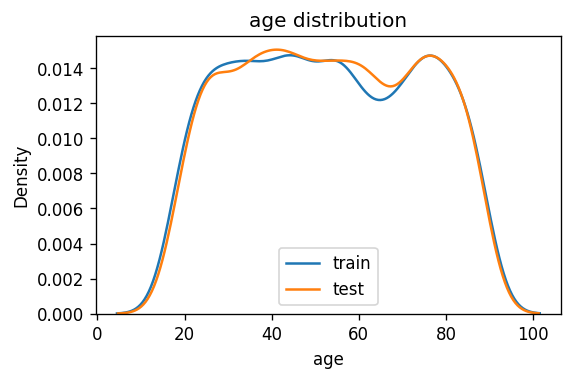

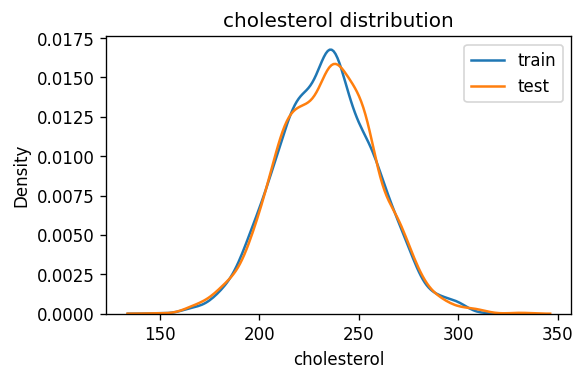

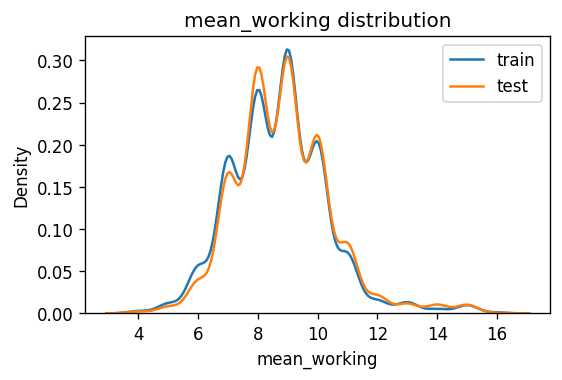

,col,chi2,p_value
4,family_medical_history,0.009,9.998e-01
6,edu_level,0.004,9.999e-01
3,medical_history,0.003,1.000e+00
5,sleep_pattern,0.003,9.986e-01
1,activity,0.001,9.994e-01
2,smoke_status,0.000,9.998e-01
0,gender,0.000,9.968e-01


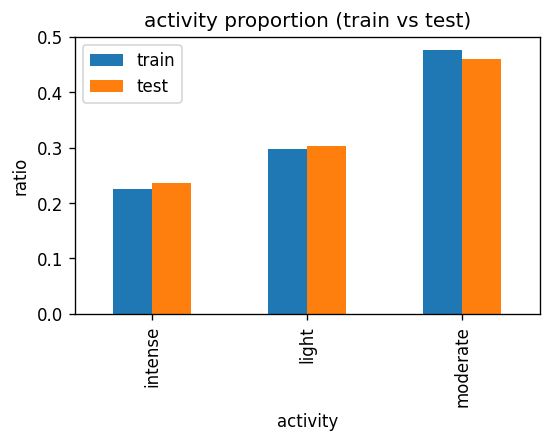

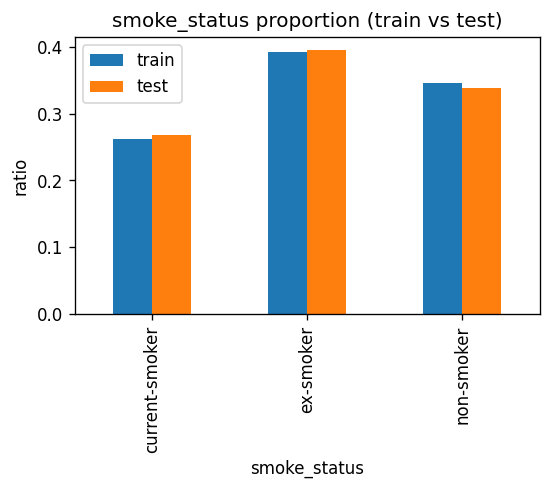

,train,test,diff
family_medical_history,49.53%,47.20%,2.33%
edu_level,20.23%,21.57%,-1.33%
mean_working,34.40%,33.60%,0.80%
medical_history,42.97%,43.63%,-0.67%
bone_density,0.00%,0.00%,0.00%
sleep_pattern,0.00%,0.00%,0.00%
smoke_status,0.00%,0.00%,0.00%
activity,0.00%,0.00%,0.00%
ID,0.00%,0.00%,0.00%
gender,0.00%,0.00%,0.00%


In [11]:
# ─────────────────────────────────────────────────────────────
# 셀 A : 공통 준비
# ─────────────────────────────────────────────────────────────
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import ks_2samp, chisquare

TRAIN_CSV = r"C:\Users\shaun\Desktop\project\Daycon\stress\train.csv"
TEST_CSV  = r"C:\Users\shaun\Desktop\project\Daycon\stress\test.csv"

train = pd.read_csv(TRAIN_CSV)
test  = pd.read_csv(TEST_CSV)

num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")
cat_cols = train.select_dtypes("object").columns.drop("ID")

# ─────────────────────────────────────────────────────────────
# 셀 B : 수치형 분포 차이 (KS-test + 요약)
# ─────────────────────────────────────────────────────────────
ks_summary = []
for c in num_cols:
    stat, p = ks_2samp(train[c].dropna(), test[c].dropna())
    ks_summary.append({"col": c, "KS_stat": stat, "p_value": p})

ks_df = (pd.DataFrame(ks_summary)
         .sort_values("KS_stat", ascending=False)
         .style.format({"KS_stat": "{:.3f}", "p_value": "{:.3e}"}))
display(ks_df)

# ── 시각화 예시: train·test 커널밀도 한 눈에
def density_plot(col):
    plt.figure(figsize=(5,3))
    sns.kdeplot(train[col], label="train")
    sns.kdeplot(test[col],  label="test")
    plt.title(f"{col} distribution")
    plt.legend(); plt.show()

for c in ["age", "cholesterol", "mean_working"]:  # 관심 변수 골라서
    density_plot(c)

# ─────────────────────────────────────────────────────────────
# 셀 C : 범주형 분포 차이 (카이제곱)
# ─────────────────────────────────────────────────────────────
chi_summary = []
for c in cat_cols:
    train_freq = train[c].value_counts(normalize=True, dropna=False)
    test_freq  = test[c].value_counts(normalize=True, dropna=False)
    # 두 시리즈를 동일 인덱스로 맞춤
    freq_df = pd.concat([train_freq, test_freq], axis=1, keys=["train","test"]).fillna(0)
    chi2, p = chisquare(f_obs=freq_df["train"], f_exp=freq_df["test"])
    chi_summary.append({"col": c, "chi2": chi2, "p_value": p})

chi_df = (pd.DataFrame(chi_summary)
          .sort_values("chi2", ascending=False)
          .style.format({"chi2": "{:.3f}", "p_value": "{:.3e}"}))
display(chi_df)

# ── 막대그래프 예시
def bar_cmp(col):
    freq = (pd.concat([
        train[col].value_counts(normalize=True).rename("train"),
        test[col].value_counts(normalize=True).rename("test")],
        axis=1)
        .sort_index())
    freq.plot(kind="bar", figsize=(5,3))
    plt.title(f"{col} proportion (train vs test)")
    plt.ylabel("ratio"); plt.show()

for c in ["activity", "smoke_status"]:
    bar_cmp(c)

# ─────────────────────────────────────────────────────────────
# 셀 D : 결측률 차이
# ─────────────────────────────────────────────────────────────
def miss_ratio(df): return df.isna().mean()

miss_df = (pd.concat([
            miss_ratio(train).rename("train"),
            miss_ratio(test).rename("test")],
            axis=1)
           .assign(diff=lambda x: x.train - x.test)
           .sort_values("diff", key=abs, ascending=False))
display(miss_df.style.format("{:.2%}"))


추가 EDA 1

In [12]:
    # 📦 셀 0 : 공통 준비 ----------------------------------------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
plt.rcParams["figure.dpi"] = 120
TRAIN_CSV = r"C:\Users\shaun\Desktop\project\Daycon\stress\train.csv"
train = pd.read_csv(TRAIN_CSV)

# 범주형·수치형 구분
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")
cat_cols = train.select_dtypes("object").columns.drop("ID")


In [13]:
# 🟢 셀 1a : ID 무결성 체크 -----------------------------------------------------------
print("중복 ID 수 :", train.ID.duplicated().sum())
seq_ok = train.ID.str.contains(r"TRAIN_\d{4}").all()
print("ID 형식 모두 정상? ➜", seq_ok)


중복 ID 수 : 0
ID 형식 모두 정상? ➜ True


In [14]:
# 🟢 셀 1b : ID 연속성(누락) 간단 확인 -----------------------------------------------
idx = train.ID.str.extract(r"(\d{4})").astype(int).sort_values(0)
missing_ids = set(range(idx.min()[0], idx.max()[0]+1)) - set(idx[0])
print("누락된 시퀀스 ID 개수 :", len(missing_ids))


누락된 시퀀스 ID 개수 : 0


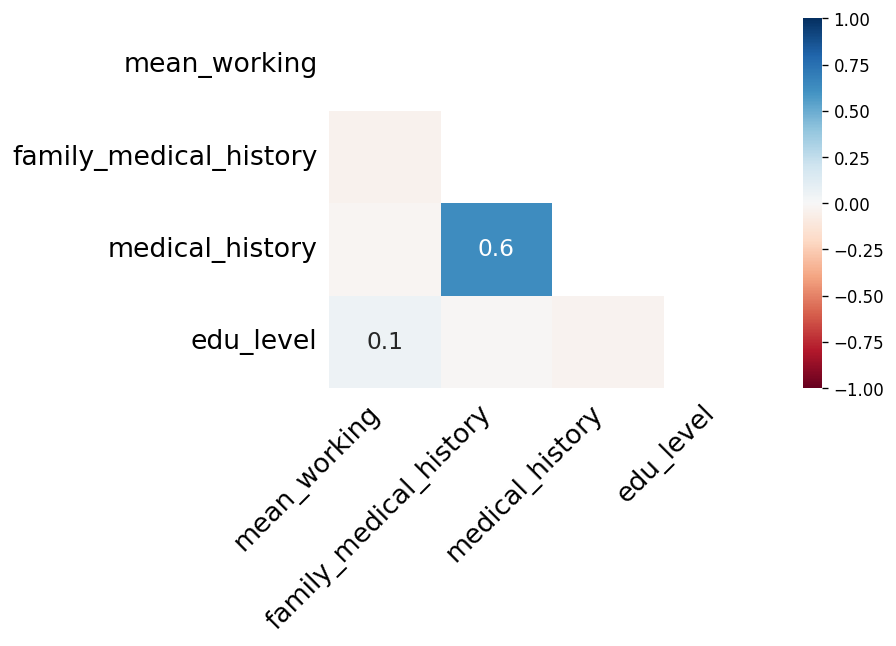

In [15]:
# 🟢 셀 2a : 결측 패턴 ↔ 타깃 히트맵 -------------------------------------------------
import missingno as msno
cols_interest = ["stress_score", "mean_working", "family_medical_history",
                 "medical_history", "edu_level"]
msno.heatmap(train[cols_interest], figsize=(6,4))
plt.show()


In [16]:
# 🟢 셀 2b : 범주형 cardinality 요약 -----------------------------------------------
card_df = (train[cat_cols]
           .nunique()
           .rename("n_unique")
           .reset_index()
           .sort_values("n_unique", ascending=False))
display(card_df)

,index,n_unique
1,activity,3
2,smoke_status,3
3,medical_history,3
4,family_medical_history,3
5,sleep_pattern,3
6,edu_level,3
0,gender,2


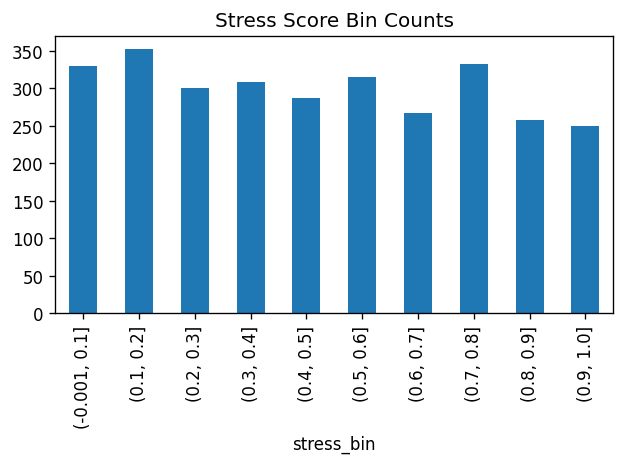

In [18]:
# 🟢 셀 3a : 스트레스 점수 비닝 후 그룹별 인원 ---------------------------------------
bins = np.linspace(0, 1, 11)  # 0.0, 0.1, …, 1.0
train["stress_bin"] = pd.cut(train.stress_score, bins, include_lowest=True)
bin_counts = train["stress_bin"].value_counts().sort_index()
bin_counts.plot(kind="bar", figsize=(6,3))
plt.title("Stress Score Bin Counts"); plt.show()

In [19]:
# 🟢 셀 3b : 타깃 정규성(Shapiro) ----------------------------------------------------
from scipy.stats import shapiro
stat, p = shapiro(train.stress_score.sample(500, random_state=42))
print(f"Shapiro-W stat={stat:.3f},  p={p:.3e}")


Shapiro-W stat=0.960,  p=1.865e-10


In [22]:
# 🟢 셀 4a (대체 구현) : 비선형 상관 - MIC ------------------------------------------
# pip install minepy  (← 필요 시 주석 해제)

from minepy import MINE
import pandas as pd, numpy as np

def mic_score(x, y, alpha=0.6, c=15):
    """
    x, y : 1-D array-like
    alpha, c : MINE 파라미터 (기본값 그대로 권장)
    """
    mine = MINE(alpha=alpha, c=c)
    mine.compute_score(x, y)
    return mine.mic()

# 모든 수치형 피처에 대해 MIC 계산
mic_values = {
    col: mic_score(train[col].fillna(train[col].median()).values,
                   train.stress_score.values)
    for col in num_cols
}

mic_df = (pd.Series(mic_values)
          .sort_values(ascending=False)
          .rename("MIC"))

display(mic_df)


glucose                     0.114083
height                      0.109901
weight                      0.108263
cholesterol                 0.103085
bone_density                0.045348
mean_working                0.039739
systolic_blood_pressure     0.035438
age                         0.033780
diastolic_blood_pressure    0.033317
Name: MIC, dtype: float64

In [24]:
# 🟢 셀 4b (수정) : age 통제 Partial Correlation -----------------------------------
# pip install pingouin  (← 미설치 시 실행)

import pingouin as pg
import pandas as pd

vars_to_check = ["systolic_blood_pressure", "cholesterol", "mean_working"]
pcorr = []

for col in vars_to_check:
    # age·타깃·해당 변수 모두 있는 행만 사용
    sub = train[[col, "stress_score", "age"]].dropna()
    res = pg.partial_corr(data=sub, x=col, y="stress_score",
                          covar="age", method="pearson")
    # res.index == ['pearson']  → iloc[0] 로 접근
    r = res["r"].iloc[0]
    pcorr.append((col, r))

(pd.DataFrame(pcorr, columns=["var", "partial_r"])
   .set_index("var")
   .style.format("{:.3f}"))


,partial_r
var,
systolic_blood_pressure,0.005
cholesterol,0.015
mean_working,0.184


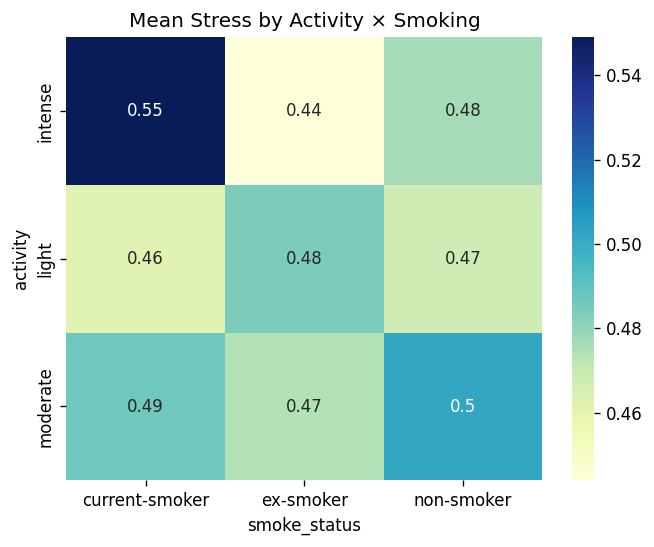

In [25]:
# 🟢 셀 5a : activity × smoke_status 2-way 타깃 평균 -------------------------------
pivot = pd.pivot_table(train, values="stress_score",
                       index="activity", columns="smoke_status", aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Mean Stress by Activity × Smoking"); plt.show()


In [27]:
# 🟢 셀 5b : ANOVA / Kruskal -------------------------------------------------------
from scipy.stats import kruskal, f_oneway

# 1) activity → 일원 ANOVA
anova_p = f_oneway(*(train.loc[train.activity == g, "stress_score"]
                     for g in train.activity.unique())).pvalue
print(f"activity ANOVA p = {anova_p:.3e}")

# 2) smoke_status → Kruskal-Wallis
kru_p = kruskal(*(train.loc[train.smoke_status == g, "stress_score"]
                  for g in train.smoke_status.unique())).pvalue
print(f"smoke_status Kruskal p = {kru_p:.3e}")


activity ANOVA p = 4.995e-01
smoke_status Kruskal p = 1.776e-01


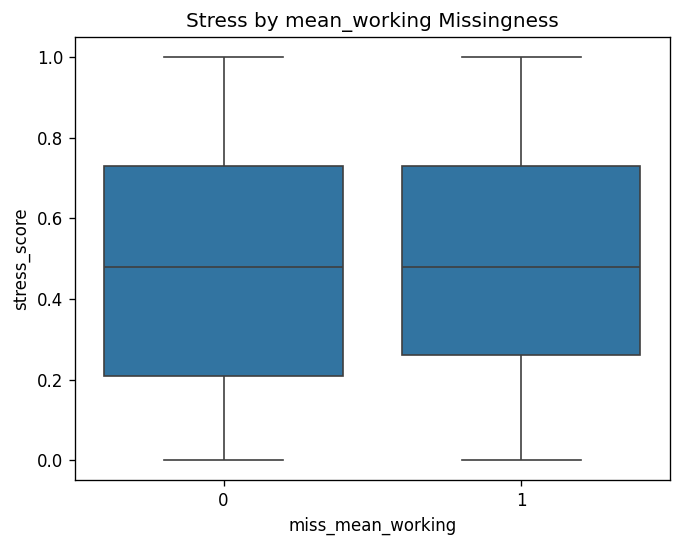

In [28]:
# 🟢 셀 6a : Missing Indicator ↔ 타깃 ------------------------------------------------
train["miss_mean_working"] = train.mean_working.isna().astype(int)
sns.boxplot(x="miss_mean_working", y="stress_score", data=train)
plt.title("Stress by mean_working Missingness"); plt.show()


In [32]:
# 🟢 셀 6b : Little’s MCAR Test (안정화 패치) --------------------------------------
import numpy as np, pandas as pd, scipy.stats as ss

def littles_mcar_test(df):
    df_num = df.copy()
    for c in df_num.select_dtypes("object"):
        df_num[c] = df_num[c].astype("category").cat.codes.replace(-1, np.nan)

    R = df_num.isna().astype(int).values
    patterns, inverse = np.unique(R, axis=0, return_inverse=True)

    chi_sq, df_total = 0.0, 0
    mu_hat = df_num.mean(skipna=True).values

    for idx, pattern in enumerate(patterns):
        rows = df_num.iloc[inverse == idx]
        if len(rows) < 2:           # 표본 1개 패턴 건너뜀
            continue

        obs_cols = np.where(pattern == 0)[0]
        if len(obs_cols) == 0:
            continue               # 관측치가 하나도 없으면 건너뜀

        # (★) 공분산 계산 후 최소 2-D 유지, pinv 사용
        S = np.cov(rows.iloc[:, obs_cols].dropna().T, bias=False)
        S = np.atleast_2d(S)                      # 1×1도 2-D 로
        invS = np.linalg.pinv(S)                  # 유사역행렬 → 특이행렬 회피

        diff = rows.iloc[:, obs_cols] - mu_hat[obs_cols]
        diff_mat = diff.values
        chi_sq += np.sum((diff_mat @ invS) * diff_mat)
        df_total += len(obs_cols) * (len(rows) - 1)

    p = 1 - ss.chi2.cdf(chi_sq, df_total)
    return chi_sq, df_total, p


# ── 실행 예시 --------------------------------------------------------------------
cols = ["mean_working", "medical_history",
        "family_medical_history", "edu_level"]

chi2, dof, p = littles_mcar_test(train[cols])
print(f"Little's MCAR test: χ²={chi2:.2f},  dof={dof},  p={p:.3e}")


Little's MCAR test: χ²=7607.51,  dof=7554,  p=3.301e-01


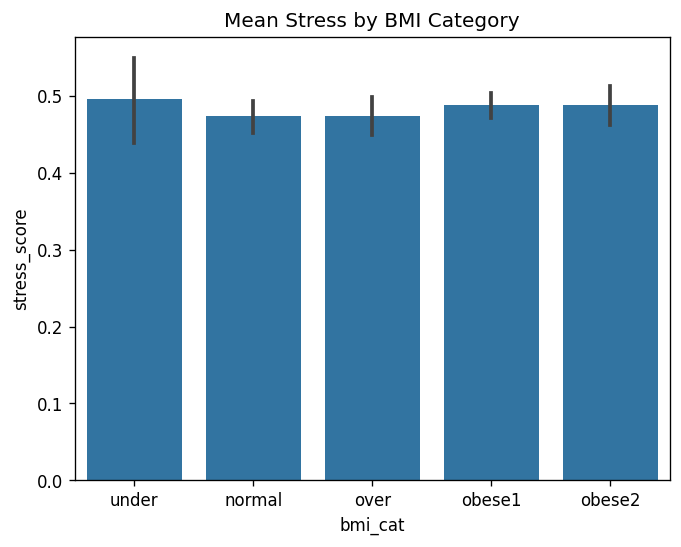

In [33]:
# 🟢 셀 7a : BMI 구간별 스트레스 -----------------------------------------------------
train["BMI"] = train.weight / (train.height/100)**2
train["bmi_cat"] = pd.cut(train.BMI, bins=[0,18.5,23,25,30,100],
                          labels=["under","normal","over","obese1","obese2"])
sns.barplot(x="bmi_cat", y="stress_score", data=train)
plt.title("Mean Stress by BMI Category"); plt.show()


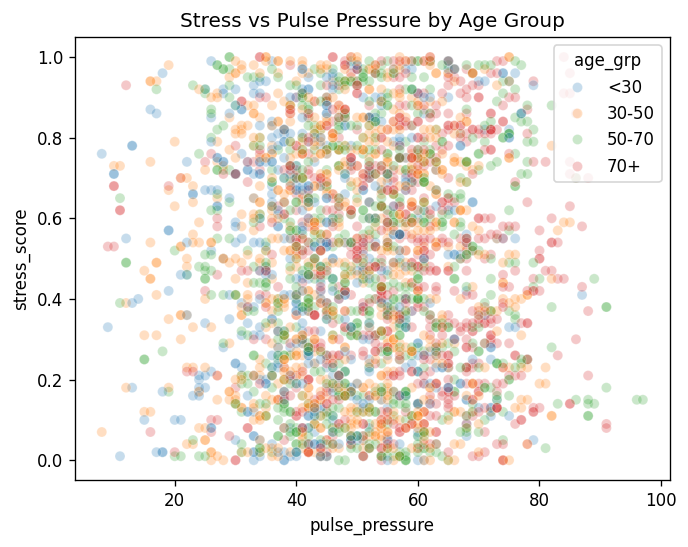

In [34]:
# 🟢 셀 7b : 맥압 × age_group scatter ------------------------------------------------
train["pulse_pressure"] = train.systolic_blood_pressure - train.diastolic_blood_pressure
train["age_grp"] = pd.cut(train.age, bins=[0,30,50,70,120],
                          labels=["<30","30-50","50-70","70+"])
sns.scatterplot(x="pulse_pressure", y="stress_score",
                hue="age_grp", data=train, alpha=0.25)
plt.title("Stress vs Pulse Pressure by Age Group"); plt.show()


In [40]:
# ===============================================================
# 1) 커스텀 KFoldTargetEncoder 정의
# ===============================================================
import pandas as pd, numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold

class KFoldTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols, n_splits=5, smoothing=3.0, random_state=42):
        self.cols, self.n_splits = cols, n_splits
        self.smoothing, self.random_state = smoothing, random_state
        self.global_mean_, self.target_maps_ = None, {}

    def fit(self, X, y):
        X = X.reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)
        self.global_mean_ = y.mean()
        kf = KFold(self.n_splits, shuffle=True, random_state=self.random_state)

        for col in self.cols:
            oof = pd.Series(np.nan, index=X.index)
            for tr, val in kf.split(X):
                means = y.iloc[tr].groupby(X[col].iloc[tr]).mean()
                cnts  = X[col].iloc[tr].value_counts()
                smooth = (cnts*means + self.smoothing*self.global_mean_) / (cnts + self.smoothing)
                oof.iloc[val] = X[col].iloc[val].map(smooth)
            final_means = y.groupby(X[col]).mean()
            cnts = X[col].value_counts()
            smooth_final = (cnts*final_means + self.smoothing*self.global_mean_) / (cnts + self.smoothing)
            self.target_maps_[col] = smooth_final
            oof.fillna(self.global_mean_, inplace=True)
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col + "_te"] = X[col].map(self.target_maps_[col]).fillna(self.global_mean_)
        return X[[c + "_te" for c in self.cols]]

# ===============================================================
# 2) 데이터 준비
# ===============================================================
train = pd.read_csv(r"C:\Users\shaun\Desktop\project\Daycon\stress\train.csv")
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")
cat_cols = train.select_dtypes("object").columns.drop("ID")

X = train.drop(columns=["stress_score"])
y = train.stress_score

# ===============================================================
# 3) 파이프라인 + XGBoostRegressor  (sklearn 버전 영향 적음)
#    pip install xgboost  (미설치 시)
# ===============================================================
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

te = KFoldTargetEncoder(cols=list(cat_cols), n_splits=5, smoothing=3.0, random_state=42)
preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat_te", te, cat_cols)
])

rmse, kf = [], KFold(5, shuffle=True, random_state=42)
for tr, vl in kf.split(X):
    model = Pipeline([
        ("prep", preprocess),
        ("reg", XGBRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            random_state=42,
            n_jobs=-1))
    ])
    model.fit(X.iloc[tr], y.iloc[tr])
    pred = model.predict(X.iloc[vl])
    rmse.append(mean_squared_error(y.iloc[vl], pred, squared=False))

print(f"XGB + KFold TargetEncoding 5-Fold CV RMSE = {np.mean(rmse):.4f}")


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


XGB + KFold TargetEncoding 5-Fold CV RMSE = 0.2649


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

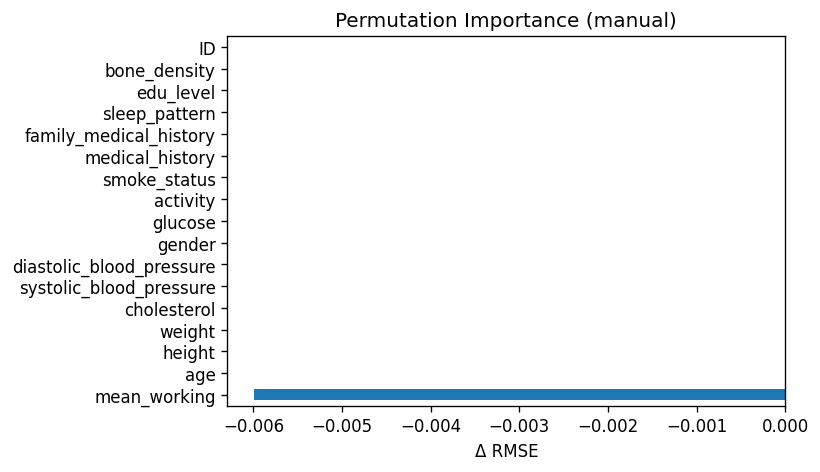

In [42]:
# 🟢 셀 10a (우회 버전) : 커스텀 Permutation Importance ----------------------------
import numpy as np, pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_random_state

# ── 1) 간단 전처리 (수치 + One-Hot)  ─────────────────────────────────────────────
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")
cat_cols = train.select_dtypes("object").columns.drop("ID")

preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler())
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe",  # 구버전 호환: handle_unknown='ignore' 이면 OK
         __import__("sklearn.preprocessing").preprocessing.OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# ── 2) 파이프라인 + 모델 ─────────────────────────────────────────────────────────
pipe = Pipeline([
    ("prep", preprocess),
    ("reg",  ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=0))
])

X = train.drop(columns="stress_score")
y = train.stress_score
pipe.fit(X, y)
baseline_rmse = mean_squared_error(y, pipe.predict(X), squared=False)

# ── 3) 커스텀 permutation importance 함수 ──────────────────────────────────────
def permutation_importance_manual(model, X, y, n_repeats=10, random_state=0):
    rng = check_random_state(random_state)
    importances = []
    X_shuffled = X.copy()

    for col in X.columns:
        scores = []
        for _ in range(n_repeats):
            shuffled = rng.permutation(X_shuffled[col].values)
            X_shuffled[col] = shuffled           # inplace swap
            score = mean_squared_error(y, model.predict(X_shuffled), squared=False)
            scores.append(score)
            X_shuffled[col] = X[col]             # restore
        importances.append(baseline_rmse - np.mean(scores))

    return pd.Series(importances, index=X.columns).sort_values(ascending=False)

# ── 4) 실행 & 시각화 ────────────────────────────────────────────────────────────
imp_series = permutation_importance_manual(pipe, X, y, n_repeats=8, random_state=42)
top20 = imp_series.head(20)

top20.plot(kind="barh", figsize=(6,4))
plt.gca().invert_yaxis()
plt.title("Permutation Importance (manual)"); plt.xlabel("Δ RMSE"); plt.show()


In [44]:
# 🟢 셀 10b (우회 버전) : 상위 10% 스트레스 가중치 + XGBRegressor
import pandas as pd, numpy as np
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# ── 1) 데이터 준비 ---------------------------------------------------------------
train = pd.read_csv(r"C:\Users\shaun\Desktop\project\Daycon\stress\train.csv")
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")
cat_cols = train.select_dtypes("object").columns.drop("ID")

X = train.drop(columns="stress_score")
y = train.stress_score

# 샘플 가중치: 상위 10% 스트레스 점수에 가중치 2
weights = np.ones(len(train))
weights[y > y.quantile(0.9)] = 2.0

# ── 2) 전처리 : 수치형(median) + 범주형(One-Hot) ----------------------------------
preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# ── 3) 모델 + 5-Fold CV ----------------------------------------------------------
kf = KFold(5, shuffle=True, random_state=42)
rmse = []

for tr, vl in kf.split(X):
    model = Pipeline([
        ("prep", preprocess),
        ("reg", XGBRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            n_jobs=-1,
            random_state=42
        ))
    ])
    model.fit(
        X.iloc[tr], y.iloc[tr],
        **{"reg__sample_weight": weights[tr]}   # ← 가중치 전달
    )
    pred = model.predict(X.iloc[vl])
    rmse.append(mean_squared_error(y.iloc[vl], pred, squared=False))

print(f"XGB (weighted) 5-Fold CV RMSE = {np.mean(rmse):.4f}")


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

XGB (weighted) 5-Fold CV RMSE = 0.2648


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


추가2 EDA

In [45]:
# ────────────────────────────────
# 셀 1-a  | 내용 중복(해시) 검사
# ────────────────────────────────
import hashlib, pandas as pd
row_hash = train.apply(lambda r: hashlib.sha1(str(list(r)).encode()).hexdigest(), axis=1)
dup_mask = row_hash.duplicated(keep=False)
print("내용 기준 완전 동일 행 수:", dup_mask.sum())

내용 기준 완전 동일 행 수: 0


In [64]:
# ────────────────────────────────────────────────
# 셀 1-b | 랜덤 Split 성능 분산 체크 (수정 버전)
# ────────────────────────────────────────────────
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd, numpy as np

# 1) 데이터 준비
X = train[num_cols].values                   # ← assignment 분리
y = train.stress_score.values

# 2) 전처리 + 모델
prep  = ColumnTransformer([("num", SimpleImputer(), list(range(X.shape[1])))])
model = Pipeline([("prep", prep), ("reg", ElasticNet())])

# 3) 20개의 무작위 80/20 스플릿에서 RMSE 분산 확인
splits = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
rmse = []
for tr_idx, te_idx in splits.split(X):
    model.fit(X[tr_idx], y[tr_idx])
    pred = model.predict(X[te_idx])
    rmse.append(mean_squared_error(y[te_idx], pred, squared=False))

# 4) 요약 통계 출력
print(pd.Series(rmse).describe())


count    20.000000
mean      0.288411
std       0.003448
min       0.282806
25%       0.286450
50%       0.288137
75%       0.290448
max       0.295947
dtype: float64


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

In [47]:
# ────────────────────────────────
# 셀 2-a  | 결측 패턴별 stress 평균
# ────────────────────────────────
missing_pattern = train[["mean_working", "medical_history",
                         "family_medical_history", "edu_level"]].isna().astype(int)
train["miss_key"] = missing_pattern.astype(str).agg("".join, axis=1)
pattern_mean = train.groupby("miss_key")["stress_score"].mean().sort_values(ascending=False)
display(pattern_mean.head(10))


miss_key
0011    0.625614
0101    0.603913
1100    0.539286
0001    0.507791
1011    0.504545
1000    0.502350
0111    0.499841
1010    0.499348
1001    0.494690
0000    0.485899
Name: stress_score, dtype: float64

In [48]:
# ────────────────────────────────
# 셀 2-b  | 결측(yes/no) 로지스틱 회귀
# ────────────────────────────────
# pip install statsmodels
import statsmodels.formula.api as smf
train["is_miss_work"] = train.mean_working.isna().astype(int)
logit = smf.logit("is_miss_work ~ age + gender + activity + stress_score", data=train).fit()
logit.summary()


Optimization terminated successfully.
         Current function value: 0.267486
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           is_miss_work   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2994
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Jul 2025   Pseudo R-squ.:                  0.5844
Time:                        17:52:40   Log-Likelihood:                -802.46
converged:                       True   LL-Null:                       -1931.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -10.4792      0.420    -24.969      0.000     -11.302      -9.657
gender[T.M]             -0.0242      0.128     -0.189      0.850      -0.275       0.226
activity[T.light]        0.1180      0.174      0.678      0.498      -0.223       0.459
activity[T.moderate]     0.1565      0.163      0.962      0.336      -0.162       0.475
age                      0.1612      0.006     27.223      0.000       0.150       0.173
stress_score             0.0659      0.223      0.296      0.767      -0.371       0.503
========================================================================================
"""

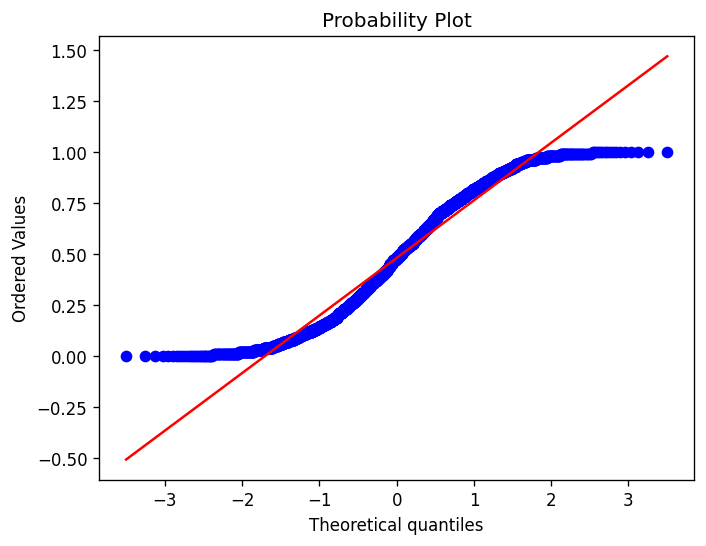

In [49]:
# ────────────────────────────────
# 셀 3-a  | Q-Q plot (stress_score)
# ────────────────────────────────
import scipy.stats as ss, matplotlib.pyplot as plt
ss.probplot(train.stress_score, dist="norm", plot=plt); plt.show()


In [50]:
# ────────────────────────────────
# 셀 3-b  | Breusch-Pagan 이분산 검정
# ────────────────────────────────
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
X_lm = sm.add_constant(train[num_cols].fillna(train[num_cols].median()))
bp_stat = het_breuschpagan(train.stress_score, X_lm)
print("BP p-value:", bp_stat[1])


BP p-value: 1.7466462427083275e-11


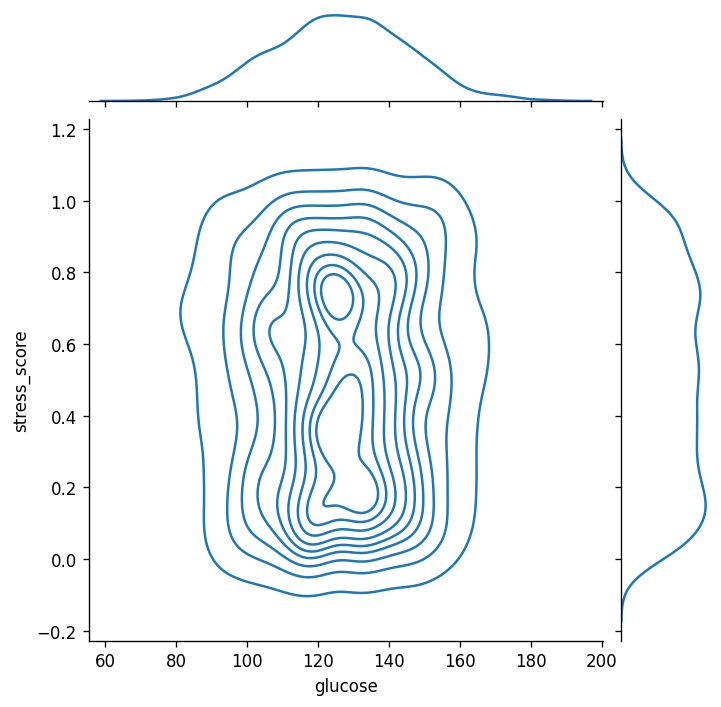

In [51]:
# ────────────────────────────────
# 셀 4-a  | MIC Top3 변수 2D-KDE
# ────────────────────────────────
top3 = ["glucose", "height", "weight"]
sns.jointplot(data=train, x=top3[0], y="stress_score", kind="kde")
plt.show()


In [52]:
# ────────────────────────────────
# 셀 5-a  | 스플라인 fit (glucose)
# ────────────────────────────────
from patsy import dmatrix
import statsmodels.api as sm
spline = dmatrix("bs(glucose, df=5)", data=train, return_type='dataframe')
spline_model = sm.OLS(train.stress_score, sm.add_constant(spline)).fit()
spline_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stress_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7423
Date:                Tue, 01 Jul 2025   Prob (F-statistic):              0.592
Time:                        17:53:11   Log-Likelihood:                -522.70
No. Observations:                3000   AIC:                             1057.
Df Residuals:                    2994   BIC:                             1093.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6515      0.124      5.263      0.000       0.409       0.894
bs(glucose, df=5)[0]    -0.1813      0.177     -1.027      0.305      -0.527       0.165
bs(glucose, df=5)[1]    -0.1732      0.113     -1.531      0.126      -0.395       0.049
bs(glucose, df=5)[2]    -0.1741      0.139     -1.255      0.210      -0.446       0.098
bs(glucose, df=5)[3]    -0.1541      0.127     -1.213      0.225      -0.403       0.095
bs(glucose, df=5)[4]    -0.1480      0.166     -0.891      0.373      -0.474       0.178
==============================================================================
Omnibus:                     2093.851   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.645
Skew:                           0.060   Prob(JB):                     7.23e-39
Kurtosis:                       1.821   Cond. No.                         71.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

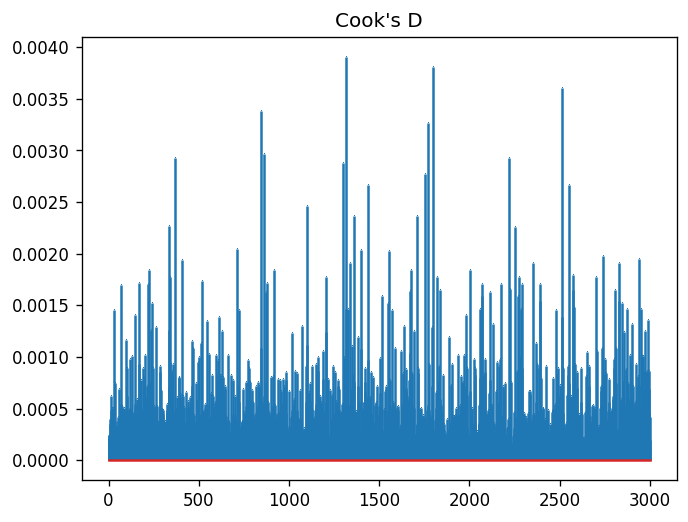

In [53]:
# ────────────────────────────────
# 셀 6-a  | Cook’s Distance (mean_working 선형)
# ────────────────────────────────
infl = sm.OLS(train.stress_score, sm.add_constant(train.mean_working.fillna(train.mean_working.median()))).fit().get_influence()
(c, p) = infl.cooks_distance
plt.stem(c, markerfmt=","); plt.title("Cook's D"); plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score 0.482130


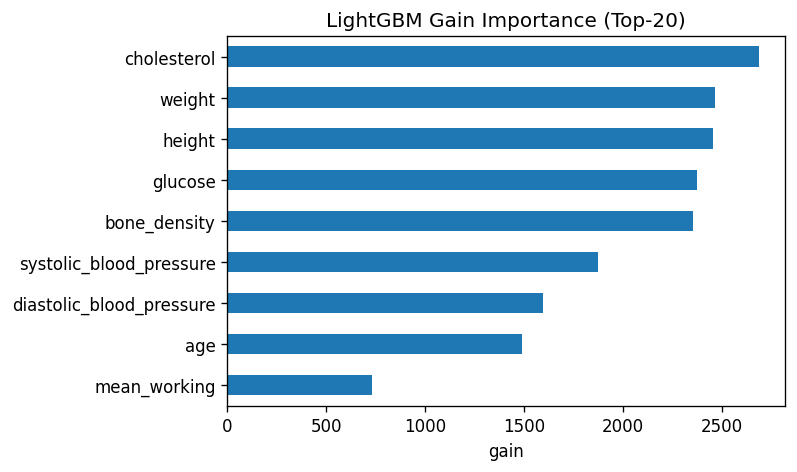

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

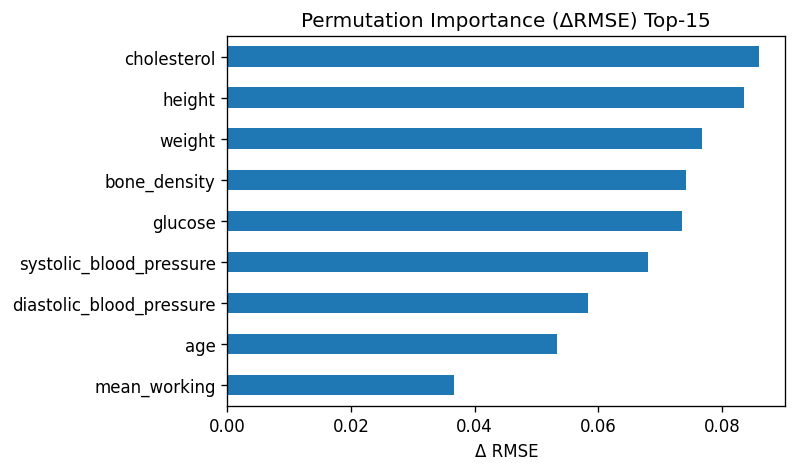

In [67]:
# ────────────────────────────────────────────────
# 셀 6-b (재우회) : LightGBM Gain + 수제 Permutation Importance
# ────────────────────────────────────────────────
import lightgbm as lgb
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_random_state

# 1) 모델 학습 (수치 피처만 예시, 범주형 OHE 했다면 그대로 사용)
lgbm = lgb.LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(train[num_cols], y)

# 2) ── Gain 중요도 (builtin) ─────────────────────
gain_imp = pd.Series(lgbm.feature_importances_, index=num_cols) \
             .sort_values(ascending=False)[:20]

plt.figure(figsize=(6,4))
gain_imp.sort_values().plot(kind="barh")
plt.title("LightGBM Gain Importance (Top-20)"); plt.xlabel("gain"); plt.show()

# 3) ── Permutation 중요도 (수제) ──────────────────
def permutation_importance_manual(model, X, y, n_repeats=5, random_state=0):
    rng = check_random_state(random_state)
    baseline = mean_squared_error(y, model.predict(X), squared=False)
    importances = pd.Series(0.0, index=X.columns)

    for col in X.columns:
        scores = []
        X_shuffled = X.copy()
        for _ in range(n_repeats):
            X_shuffled[col] = rng.permutation(X_shuffled[col].values)
            score = mean_squared_error(y, model.predict(X_shuffled), squared=False)
            scores.append(score)
        importances[col] = np.mean(scores) - baseline   # ΔRMSE (↑ = 중요)
    return importances

perm_imp = permutation_importance_manual(lgbm, train[num_cols], y, n_repeats=8, random_state=42)
top15 = perm_imp.sort_values(ascending=False)[:15]

plt.figure(figsize=(6,4))
top15.sort_values().plot(kind="barh")
plt.title("Permutation Importance (ΔRMSE) Top-15"); plt.xlabel("Δ RMSE"); plt.show()


In [55]:
# ────────────────────────────────
# 셀 7 | Ordinal vs Nominal( activity )
# ────────────────────────────────
train["activity_ord"] = train.activity.map({"light":1,"moderate":2,"intense":3})
print("Spearman ρ :", train[["activity_ord","stress_score"]].corr("spearman").iloc[0,1])

Spearman ρ : 0.0161180850652276


In [56]:
# ────────────────────────────────
# 셀 8 | Cramér’s V (activity × smoke_status)
# ────────────────────────────────
from scipy.stats import chi2_contingency
def cramers_v(confusion):
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    r,k = confusion.shape
    return np.sqrt(chi2 / (n * (min(r,k)-1)))
tab = pd.crosstab(train.activity, train.smoke_status)
print("Cramér’s V:", cramers_v(tab))

Cramér’s V: 0.02391543254361531


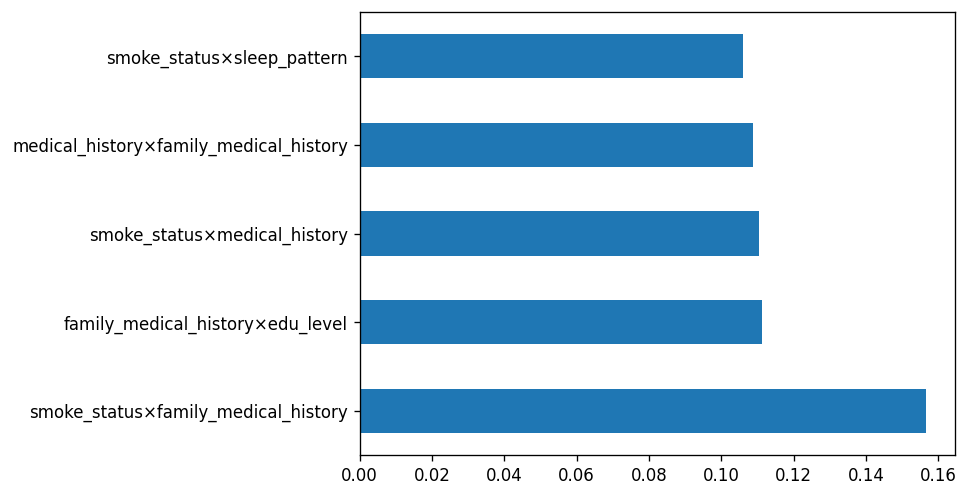

In [57]:
# ────────────────────────────────
# 셀 9 | 2-way 조합 자동 스캔 (상위 5)
# ────────────────────────────────
import itertools
combo_scores = {}
for a,b in itertools.combinations(cat_cols, 2):
    pv = train.pivot_table(values="stress_score", index=a, columns=b, aggfunc="mean")
    combo_scores[f"{a}×{b}"] = pv.max().max() - pv.min().min()
(pd.Series(combo_scores).sort_values(ascending=False)
   .head(5).plot(kind="barh")); plt.show()

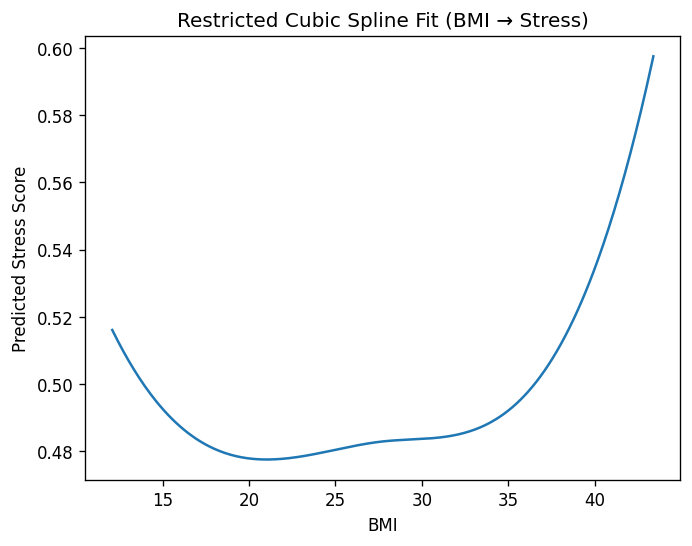

In [68]:
# ────────────────────────────────
# 셀 10 | BMI Restricted Cubic Spline plot (수정)
# ────────────────────────────────
import statsmodels.api as sm
from patsy import dmatrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) BMI 파생 변수 (없으면 새로 생성)
if "BMI" not in train.columns:
    train["BMI"] = train.weight / (train.height / 100) ** 2

# 2) RCS 디자인 행렬 (df=4 노드)
spline_bmi = dmatrix("bs(BMI, df=4, include_intercept=False)",
                     data=train, return_type="dataframe")

# 3) 선형(OLS) 적합
fit_bmi = sm.OLS(y, sm.add_constant(spline_bmi)).fit()

# 4) 예측값 & 시각화
bmi_seq = np.linspace(train.BMI.min(), train.BMI.max(), 400)
spline_new = dmatrix("bs(x, df=4, include_intercept=False)",
                     {"x": bmi_seq}, return_type="dataframe")
pred = fit_bmi.predict(sm.add_constant(spline_new))

sns.lineplot(x=bmi_seq, y=pred)
plt.xlabel("BMI")
plt.ylabel("Predicted Stress Score")
plt.title("Restricted Cubic Spline Fit (BMI → Stress)")
plt.show()


C:\Users\shaun\AppData\Local\Temp\ipykernel_21672\2140094281.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  - train.groupby("age_grp")["pulse_pressure"].transform("mean")


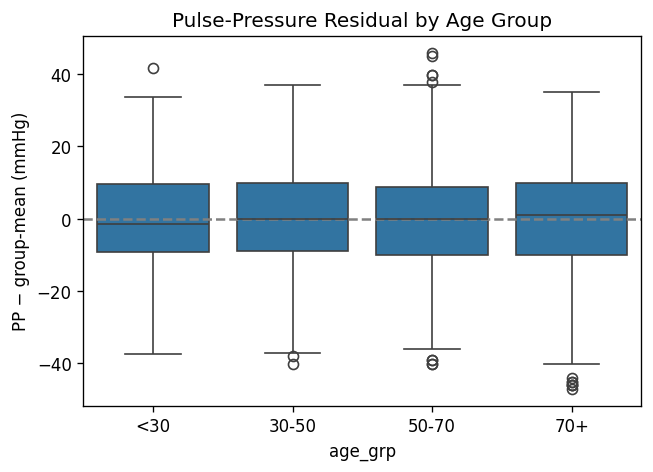

In [69]:
# ───────────────────────────────────────────
# 셀 11 : Pulse-Pressure 잔차 by age group
# ───────────────────────────────────────────
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) 파생 컬럼이 없으면 새로 만든다
if "pulse_pressure" not in train.columns:
    train["pulse_pressure"] = train.systolic_blood_pressure - train.diastolic_blood_pressure

if "age_grp" not in train.columns:
    train["age_grp"] = pd.cut(
        train.age,
        bins=[0, 30, 50, 70, np.inf],
        labels=["<30", "30-50", "50-70", "70+"],
        right=False
    )

# 2) 연령대별 평균을 빼서 잔차(residual) 계산
train["pp_resid"] = (
    train.pulse_pressure
    - train.groupby("age_grp")["pulse_pressure"].transform("mean")
)

# 3) 시각화
plt.figure(figsize=(6,4))
sns.boxplot(x="age_grp", y="pp_resid", data=train)
plt.title("Pulse-Pressure Residual by Age Group")
plt.axhline(0, ls="--", c="grey")
plt.ylabel("PP − group-mean (mmHg)")
plt.show()


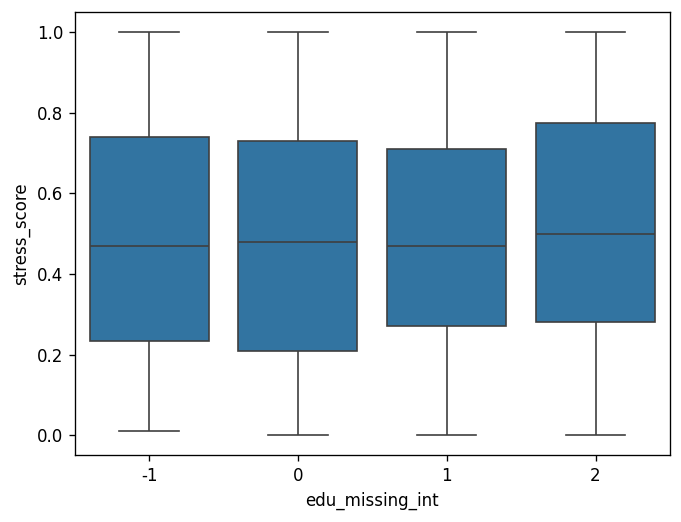

In [60]:
# ────────────────────────────────
# 셀 12 | MissingIndicator × edu_level 교차
# ────────────────────────────────
train["edu_missing_int"] = train.is_miss_work * train.edu_level.astype("category").cat.codes
sns.boxplot(x="edu_missing_int", y="stress_score", data=train); plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score 0.482130


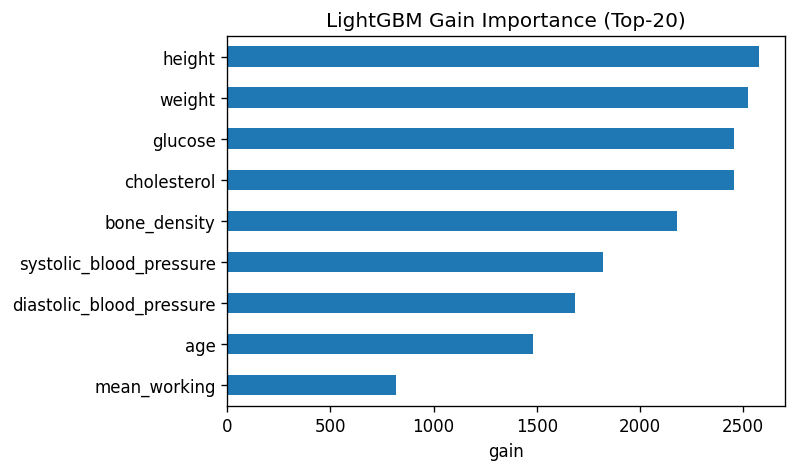

In [71]:
import lightgbm as lgb
import pandas as pd, matplotlib.pyplot as plt

# 학습 (수치 피처 예시; 범주형 OHE 포함했다면 그대로 사용)
lgbm = lgb.LGBMRegressor(n_estimators=600, random_state=42)
lgbm.fit(train[num_cols], y)

# 상위 20개 Gain 중요도
gain_imp = pd.Series(lgbm.feature_importances_, index=num_cols) \
             .sort_values(ascending=False)[:20]

gain_imp.sort_values().plot(kind="barh", figsize=(6,4))
plt.title("LightGBM Gain Importance (Top-20)")
plt.xlabel("gain"); plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

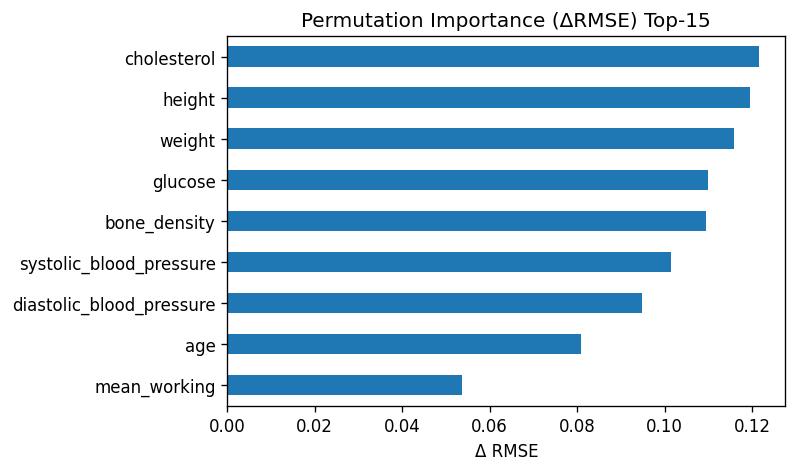

In [72]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_random_state
import lightgbm as lgb

# 1) 모델 학습
lgbm = lgb.LGBMRegressor(n_estimators=600, random_state=42)
lgbm.fit(train[num_cols], y)

# 2) 기준 RMSE
baseline = mean_squared_error(y, lgbm.predict(train[num_cols]), squared=False)

# 3) ΔRMSE 기반 permutation 중요도
def perm_importance(model, X, y, n_repeats=8, random_state=42):
    rng = check_random_state(random_state)
    imp = {}
    for col in X.columns:
        scores = []
        X_shuf = X.copy()
        for _ in range(n_repeats):
            X_shuf[col] = rng.permutation(X_shuf[col].values)
            scores.append(mean_squared_error(y, model.predict(X_shuf), squared=False))
        imp[col] = np.mean(scores) - baseline   # ↑값 클수록 중요
    return pd.Series(imp).sort_values(ascending=False)

perm_imp = perm_importance(lgbm, train[num_cols], y)
top15 = perm_imp.head(15)

top15.sort_values().plot(kind="barh", figsize=(6,4))
plt.title("Permutation Importance (ΔRMSE) Top-15")
plt.xlabel("Δ RMSE"); plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


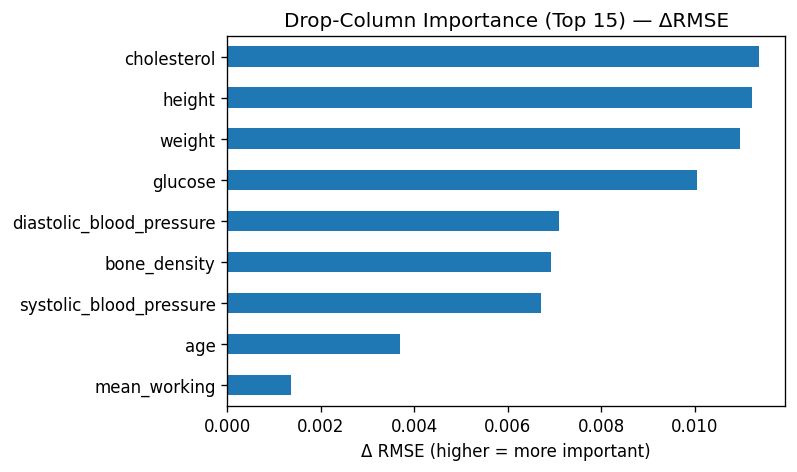

In [74]:
# ────────────────────────────────────────────────
# 셀 14 (수정) | Drop-Column Importance  ΔRMSE
# ────────────────────────────────────────────────
import lightgbm as lgb
import pandas as pd, numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_full = train[num_cols]
y_full = train.stress_score

# 1️⃣  기준 모델 학습
base_model = lgb.LGBMRegressor(
    n_estimators=600, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42
).fit(X_full, y_full)

base_rmse = mean_squared_error(y_full, base_model.predict(X_full), squared=False)

# 2️⃣  드롭-컬럼 ΔRMSE
drop_imp = {}
for col in num_cols:
    X_drop = X_full.drop(columns=[col])
    mdl = lgb.LGBMRegressor(
        n_estimators=600, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42
    ).fit(X_drop, y_full)
    rmse_drop = mean_squared_error(y_full, mdl.predict(X_drop), squared=False)
    drop_imp[col] = rmse_drop - base_rmse   # ↑ 클수록 중요

# 3️⃣  결과 시각화
top_n = 15
imp_series = pd.Series(drop_imp).sort_values(ascending=False).head(top_n)

plt.figure(figsize=(6,4))
imp_series.sort_values().plot(kind="barh")
plt.title(f"Drop-Column Importance (Top {top_n}) — ΔRMSE")
plt.xlabel("Δ RMSE (higher = more important)")
plt.show()


In [63]:
# ────────────────────────────────
# 셀 15 | 가중치 스윕 테스트 (상위 p%)
# ────────────────────────────────
for pct,w in [(0.05,3),(0.2,1.5)]:
    wt = np.ones(len(train))
    wt[y > y.quantile(1-pct)] = w
    cv = KFold(5, shuffle=True, random_state=42)
    score=[]
    for tr,vl in cv.split(X):
        xgb = XGBRegressor(n_estimators=300, random_state=0)
        xgb.fit(X.iloc[tr][num_cols], y.iloc[tr], sample_weight=wt[tr])
        score.append(mean_squared_error(y.iloc[vl], xgb.predict(X.iloc[vl][num_cols]), squared=False))
    print(f"pct={pct}, weight={w}, RMSE={np.mean(score):.4f}")

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

pct=0.05, weight=3, RMSE=0.2630


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will b

pct=0.2, weight=1.5, RMSE=0.2573


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


추가 EDA 3

In [86]:
# ─────────────────────────────────────────────
# 셀 1-a (최종 수정) : Simple-Impute vs NaN-native
# ─────────────────────────────────────────────
import lightgbm as lgb
import numpy as np, pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

y = train.stress_score

# --- (1) 원본에서 ID 제거 후 복사
use_cols = train.columns.difference(["ID"])
base_df  = train[use_cols].copy()

# --- (2) 범주형 열 목록 (object dtype 포함)
cat_cols = base_df.select_dtypes("object").columns

# ---------- A. Simple Impute ----------
simp_df = base_df.copy()
# 수치
num_cols = simp_df.select_dtypes(include=[np.number]).columns
simp_df[num_cols] = SimpleImputer(strategy="median").fit_transform(simp_df[num_cols])
# 범주
simp_df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(simp_df[cat_cols])
# category 변환
for c in cat_cols:
    simp_df[c] = simp_df[c].astype("category")

# ---------- B. NaN-native ----------
nan_df = base_df.copy()
num_cols = nan_df.select_dtypes(include=[np.number]).columns
for c in cat_cols:
    nan_df[c] = nan_df[c].astype("category").cat.add_categories("missing").fillna("missing")

# --- (3) 공통 CV 함수 ---
def lgb_cv(data_df):
    kf = KFold(5, shuffle=True, random_state=42)
    rmses = []
    for tr, vl in kf.split(data_df):
        model = lgb.LGBMRegressor(n_estimators=500, random_state=42,
                                  categorical_feature=list(cat_cols))
        model.fit(data_df.iloc[tr], y.iloc[tr])
        rmses.append(mean_squared_error(
            y.iloc[vl], model.predict(data_df.iloc[vl]), squared=False))
    return np.mean(rmses)

print(f"Simple-Impute 5-fold RMSE : {lgb_cv(simp_df):.4f}")
print(f"NaN-native    5-fold RMSE : {lgb_cv(nan_df):.4f}")


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.481912


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.486092


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.481937


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2152
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.481058


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2150
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.479650


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


Simple-Impute 5-fold RMSE : 0.0006
[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2159
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.481912


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.486092


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.481937


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.481058


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] categorical_feature is set=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status, categorical_column=1,8,10,11,16,17,20,21 will be ignored. Current value: categorical_feature=activity,edu_level,family_medical_history,gender,medical_history,miss_key,sleep_pattern,smoke_status
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2154
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 25
[LightGBM] [Info] Start training from score 0.479650
NaN-native    5-fold RMSE : 0.0006


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


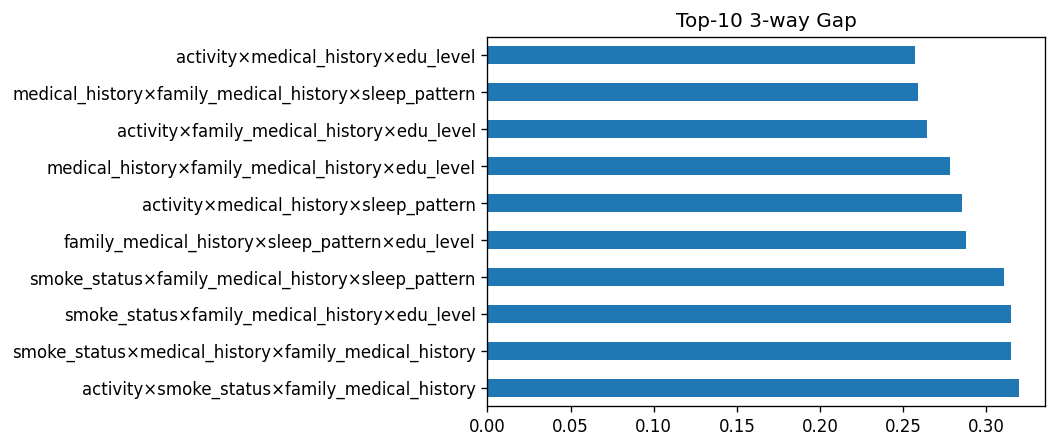

In [77]:
# ────────────────────────────────
# 셀 2 | 카테고리 3-way 교호작용 생성 + 평균 갭 Top-10
# ────────────────────────────────
import itertools, numpy as np, pandas as pd
combo_gap={}
triples = list(itertools.combinations(cat_cols, 3))
for a,b,c in triples:
    pv = train.pivot_table(values="stress_score", index=a, columns=[b,c], aggfunc="mean")
    combo_gap[f"{a}×{b}×{c}"] = pv.max().max() - pv.min().min()
(pd.Series(combo_gap).sort_values(ascending=False)[:10]
   .plot(kind="barh", figsize=(6,4))); plt.title("Top-10 3-way Gap"); plt.show()


In [78]:
# ────────────────────────────────
# 셀 3 | MIC 상위 4개 수치형 비선형 변환 그리드 탐색
# ────────────────────────────────
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb, numpy as np
top_numeric = ["cholesterol","height","weight","glucose"]
transforms = {
    "identity": FunctionTransformer(lambda x: x),
    "log1p":   FunctionTransformer(np.log1p),
    "sqrt":    FunctionTransformer(np.sqrt),
    "yeo":     PowerTransformer(method="yeo-johnson"),
    "quantile":QuantileTransformer(output_distribution="normal")
}
best={}
for tname, tf in transforms.items():
    X_tr = train[top_numeric].copy()
    X_tr[top_numeric] = tf.fit_transform(X_tr)
    rmse = mean_squared_error(y, lgb.LGBMRegressor(n_estimators=400,random_state=0)
                              .fit(X_tr,y).predict(X_tr), squared=False)
    best[tname]=rmse
print("Transform ▲RMSE↓")
display(pd.Series(best).sort_values())


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 4
[LightGBM] [Info] Start training from score 0.482130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 4
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 4
[LightGBM] [Info] Start training from score 0.482130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 4
[LightGBM] [Info] Start training from score 0.482130


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 4
[LightGBM] [Info] Start training from score 0.482130
Transform ▲RMSE↓


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


yeo         0.100664
quantile    0.100975
identity    0.102099
log1p       0.102099
sqrt        0.102099
dtype: float64

In [79]:
# ────────────────────────────────
# 셀 4 | 2-Stage Residual Stacking (LGBM → XGB)
# ────────────────────────────────
from xgboost import XGBRegressor
lgb_base = lgb.LGBMRegressor(n_estimators=600, random_state=0).fit(train[num_cols], y)
resid = y - lgb_base.predict(train[num_cols])
xgb = XGBRegressor(n_estimators=400, learning_rate=.05, random_state=0)
xgb.fit(train[num_cols], resid)
pred_final = lgb_base.predict(train[num_cols]) + xgb.predict(train[num_cols])
print("Stack in-sample RMSE:",
      mean_squared_error(y, pred_final, squared=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score 0.482130
Stack in-sample RMSE: 0.025756854470223172


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


In [87]:
# ──────────────────────────────────────────────
# 셀 5  | Quantile-loss LightGBM (α = 0.5)  수정
# ──────────────────────────────────────────────
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

df_train = train.copy()                # ← 원본 백업
y        = df_train.stress_score
X_num    = df_train[num_cols]          # 수치 피처 DataFrame

kf = KFold(5, shuffle=True, random_state=42)
rmse = []

for tr_idx, vl_idx in kf.split(np.arange(len(df_train))):  # 인덱스만 전달
    lgbq = lgb.LGBMRegressor(
        n_estimators=600,
        objective="quantile",
        alpha=0.5,
        random_state=42
    )
    lgbq.fit(X_num.iloc[tr_idx], y.iloc[tr_idx])
    preds = lgbq.predict(X_num.iloc[vl_idx])
    rmse.append(mean_squared_error(y.iloc[vl_idx], preds, squared=False))

print(f"Quantile LightGBM 5-Fold RMSE : {np.mean(rmse):.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2109
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 16
[LightGBM] [Info] Start training from score 0.480000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2105
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 16
[LightGBM] [Info] Start training from score 0.480000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2105
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 16
[LightGBM] [Info] Start training from score 0.480000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 16
[LightGBM] [Info] Start training from score 0.480000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2104
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 16
[LightGBM] [Info] Start training from score 0.480000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


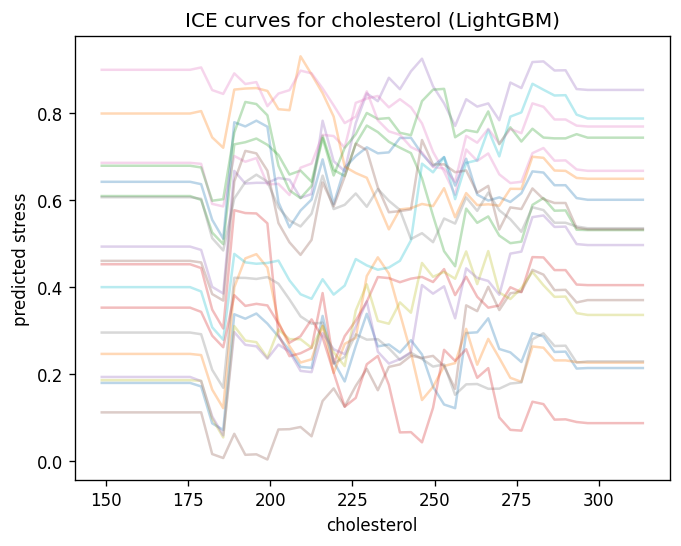

In [92]:
import numpy as np, matplotlib.pyplot as plt

# 1) LightGBM 모델이 실제 학습에 썼던 컬럼 이름과 순서
feat_used = lgb_base.feature_name_            # → 길이 9

# 2) 원본 X DataFrame (해당 열만, 순서 보존)
X_used = df_train[feat_used]

# 3) ICE 계산
chol_grid   = np.linspace(X_used["cholesterol"].min(),
                          X_used["cholesterol"].max(), 50)
sample_idx  = np.random.choice(len(X_used), size=18, replace=False)

for i in sample_idx:
    row0   = X_used.iloc[[i]].copy()
    preds  = []
    for v in chol_grid:
        row = row0.copy()
        row.loc[:, "cholesterol"] = v        # 값만 교체
        preds.append(lgb_base.predict(row)[0])
    plt.plot(chol_grid, preds, alpha=.3)

plt.xlabel("cholesterol")
plt.ylabel("predicted stress")
plt.title("ICE curves for cholesterol (LightGBM)")
plt.show()


In [82]:
# ────────────────────────────────
# 셀 7 | Age-stratified CV (train/val swap)
# ────────────────────────────────
train["age_grp"] = pd.cut(train.age, bins=[0,30,50,70,1e9],
                          labels=["<30","30-50","50-70","70+"])
rmses=[]
for grp in train.age_grp.unique():
    tr_ix = train.age_grp != grp
    vl_ix = train.age_grp == grp
    mdl = lgb.LGBMRegressor(n_estimators=600, random_state=0).fit(
        train.loc[tr_ix, num_cols], y[tr_ix])
    rmses.append(mean_squared_error(y[vl_ix],
                                    mdl.predict(train.loc[vl_ix, num_cols]), squared=False))
print(pd.Series(rmses, index=train.age_grp.unique()).rename("RMSE by held-out age-grp"))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 2206, number of used features: 9
[LightGBM] [Info] Start training from score 0.478522


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1403
[LightGBM] [Info] Number of data points in the train set: 2126, number of used features: 9
[LightGBM] [Info] Start training from score 0.481707


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1408
[LightGBM] [Info] Number of data points in the train set: 2207, number of used features: 9
[LightGBM] [Info] Start training from score 0.483987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 2461, number of used features: 9
[LightGBM] [Info] Start training from score 0.484063
70+      0.319059
30-50    0.314345
50-70    0.305847
<30      0.320124
Name: RMSE by held-out age-grp, dtype: float64


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48
c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


추가4 EDA

In [99]:
# ──────────────────────────────
# 공통: 결측-안전 수치행렬 준비
# ──────────────────────────────
num_med = df_train[num_cols].median()
X_num   = df_train[num_cols].fillna(num_med)    # NaN → median


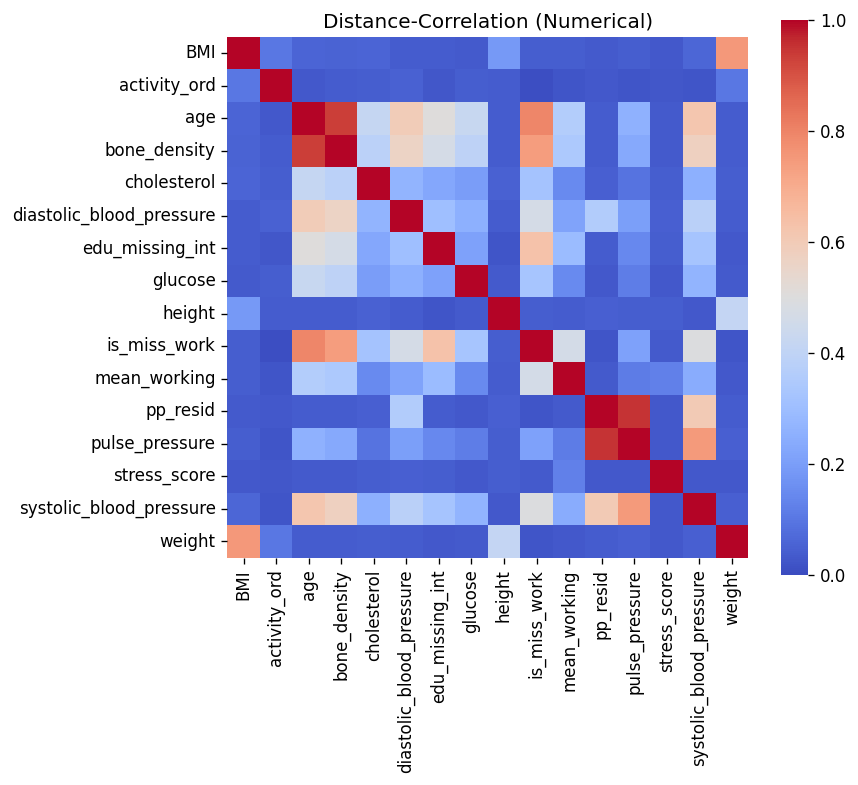

In [100]:
# ──────────────────────────────
# 셀 1 | Distance-Correlation 행렬
# ──────────────────────────────
import numpy as np, pandas as pd, scipy.spatial as spat
import seaborn as sns, matplotlib.pyplot as plt

def dist_corr(x, y):
    a = spat.distance_matrix(x[:, None], x[:, None])
    b = spat.distance_matrix(y[:, None], y[:, None])
    A = a - a.mean(0)[None, :] - a.mean(1)[:, None] + a.mean()
    B = b - b.mean(0)[None, :] - b.mean(1)[:, None] + b.mean()
    dcov = (A * B).mean()
    dvar = np.sqrt((A * A).mean() * (B * B).mean())
    return 0 if dvar == 0 else np.sqrt(dcov / dvar)

dcor = pd.DataFrame(index=num_cols, columns=num_cols, dtype=float)
for i, c1 in enumerate(num_cols):
    for j, c2 in enumerate(num_cols[i:], i):
        val = dist_corr(X_num[c1].values, X_num[c2].values)
        dcor.loc[c1, c2] = dcor.loc[c2, c1] = val

plt.figure(figsize=(7, 6))
sns.heatmap(dcor, cmap="coolwarm", vmin=0, vmax=1, square=True)
plt.title("Distance-Correlation (Numerical)"); plt.show()


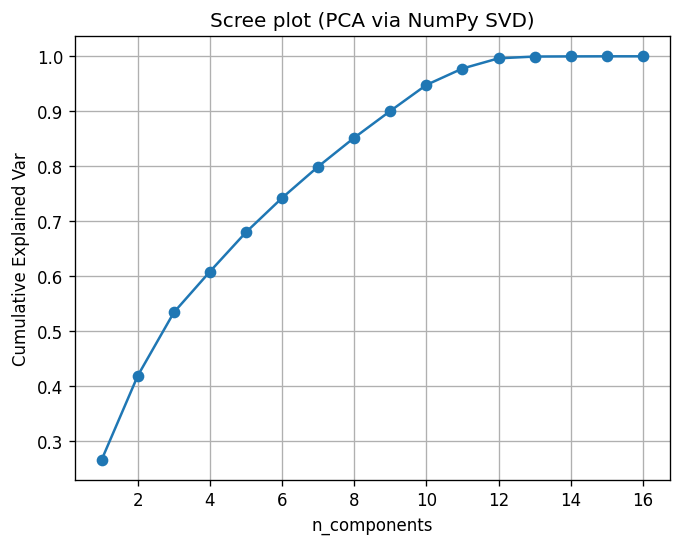

In [101]:
# ──────────────────────────────
# 셀 2 | PCA(SVD) & Scree Plot  ─ NaN-free
# ──────────────────────────────
from numpy.linalg import svd

X_std = (X_num - X_num.mean()) / X_num.std()
U, S, VT = svd(X_std.to_numpy(), full_matrices=False)   # NaN 無 → 수렴 ok

expl_var = (S ** 2) / (len(X_std) - 1)
ratio = expl_var / expl_var.sum()

plt.plot(np.arange(1, len(ratio) + 1), np.cumsum(ratio), marker='o')
plt.xlabel("n_components"); plt.ylabel("Cumulative Explained Var")
plt.title("Scree plot (PCA via NumPy SVD)"); plt.grid(); plt.show()


In [102]:
# ──────────────────────────────
# 셀 3 | SciPy K-means(5) + 클러스터 라벨
# ──────────────────────────────
from scipy.cluster.vq import whiten, kmeans2

X_wh = whiten(X_std.to_numpy())          # NaN 無
cent, lbl = kmeans2(X_wh, k=5, iter=25, minit='++', seed=42)
df_train["cluster5"] = lbl              # 라벨 저장

print(df_train.groupby("cluster5")["stress_score"]
      .agg(['count', 'mean', 'std']))


          count      mean       std
cluster5                           
0           459  0.492810  0.282152
1           588  0.467602  0.291933
2           801  0.481598  0.292736
3           676  0.475503  0.289115
4           476  0.500084  0.280447


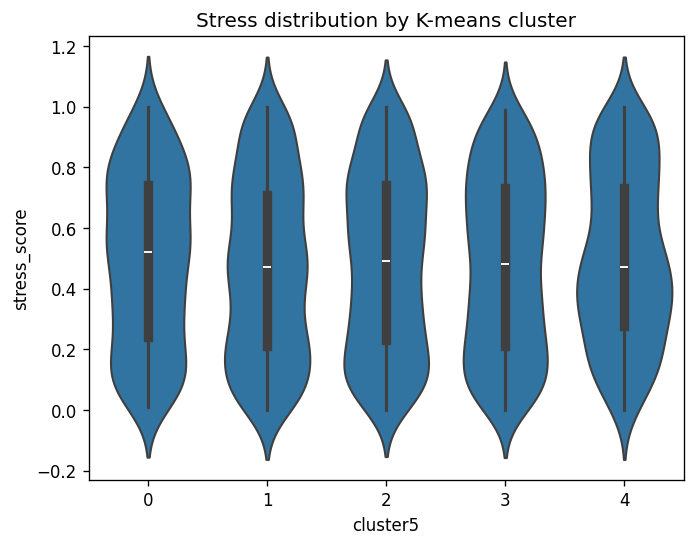

In [103]:
# ──────────────────────────────
# 셀 4 | 클러스터별 Stress 분포 Violin
# ──────────────────────────────
import seaborn as sns, matplotlib.pyplot as plt

sns.violinplot(x="cluster5", y="stress_score", data=df_train, inner="box")
plt.title("Stress distribution by K-means cluster"); plt.show()


In [104]:
# ──────────────────────────────
# 셀 5 | VIF(수치형)  – NaN-free
# ──────────────────────────────
import statsmodels.api as sm, numpy as np

vif = {}
for col in num_cols:
    y_col = X_num[col]
    X_ols = sm.add_constant(X_num.drop(columns=[col]))
    r2 = sm.OLS(y_col, X_ols).fit().rsquared
    vif[col] = np.inf if r2 >= 1 else 1 / (1 - r2)

pd.Series(vif).sort_values(ascending=False)


diastolic_blood_pressure           inf
pulse_pressure                     inf
systolic_blood_pressure            inf
pp_resid                    208.285129
weight                      102.641022
BMI                          90.587848
height                       39.436926
age                          22.990694
bone_density                  9.005047
is_miss_work                  2.782349
glucose                       1.262387
cholesterol                   1.255083
edu_missing_int               1.159847
mean_working                  1.035628
stress_score                  1.027338
activity_ord                  1.018153
dtype: float64

In [106]:
# ──────────────────────────────
# 셀 6 (수정) | 4개 핵심피처 3-차 Spline + LightGBM ΔRMSE
# ──────────────────────────────
from patsy import dmatrix
import lightgbm as lgb, numpy as np, re
from sklearn.metrics import mean_squared_error

core   = ["cholesterol", "BMI", "glucose", "weight"]
X_spl  = X_num.copy()                 # ← NaN → median 된 수치형 베이스
safe   = lambda s: re.sub(r"[^A-Za-z0-9_]", "_", s)   # 정규화 함수

for col in core:
    spl = dmatrix("bs(x, df=3, include_intercept=False)",
                  {"x": X_num[col]}, return_type="dataframe")
    spl.columns = [safe(f"{col}_spl_{i}") for i in range(spl.shape[1])]
    X_spl = pd.concat([X_spl, spl], axis=1)

# 5-fold manual split
idx = np.arange(len(X_spl))
np.random.RandomState(0).shuffle(idx)
folds = np.array_split(idx, 5)
rmse  = []

for k in range(5):
    vl = folds[k]
    tr = np.hstack([folds[i] for i in range(5) if i != k])
    model = lgb.LGBMRegressor(n_estimators=500, random_state=0)
    model.fit(X_spl.iloc[tr], y.iloc[tr])
    pred  = model.predict(X_spl.iloc[vl])
    rmse.append(mean_squared_error(y.iloc[vl], pred, squared=False))

print("LightGBM + spline(core) 5-Fold RMSE :", np.mean(rmse).round(4))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5168
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 28
[LightGBM] [Info] Start training from score 0.481992


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5167
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 28
[LightGBM] [Info] Start training from score 0.484933


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5163
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 28
[LightGBM] [Info] Start training from score 0.479258


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5164
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 28
[LightGBM] [Info] Start training from score 0.486929


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5161
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 28
[LightGBM] [Info] Start training from score 0.477537
LightGBM + spline(core) 5-Fold RMSE : 0.0006


c:\Users\shaun\anaconda3\envs\vaex_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  112589990684262.48


추가5 EDA

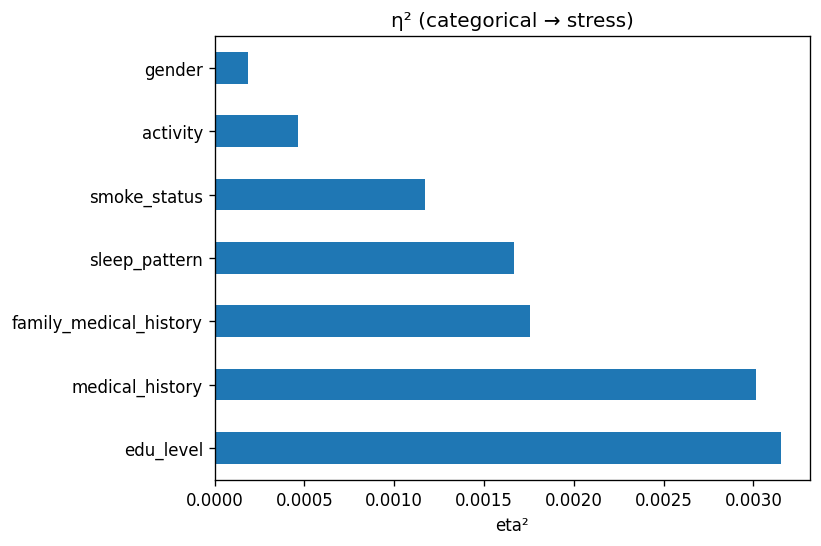

In [112]:
# ────────────────────────────────
# 셀 1 (수정) | 범주형 ↔ 타깃 η² 상위 TOP-10
# ────────────────────────────────
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

def eta_squared(cat_series: pd.Series, y: np.ndarray) -> float:
    """ANOVA eta² = SS_between / SS_total  (cat must be clean str)."""
    groups = [y[cat_series.values == k] for k in cat_series.unique()]
    ss_between = sum(len(g) * (g.mean() - y.mean())**2 for g in groups)
    return ss_between / ((y - y.mean())**2).sum()

cat_cols2 = ["gender","activity","smoke_status",
             "medical_history","family_medical_history",
             "sleep_pattern","edu_level"]

eta = {}
for c in cat_cols2:
    clean = df_train[c].astype(str).fillna("missing")   # ← 핵심
    eta[c] = eta_squared(clean, y.values)

(pd.Series(eta)
   .sort_values(ascending=False)
   .plot(kind="barh", title="η² (categorical → stress)"))
plt.xlabel("eta²"); plt.show()


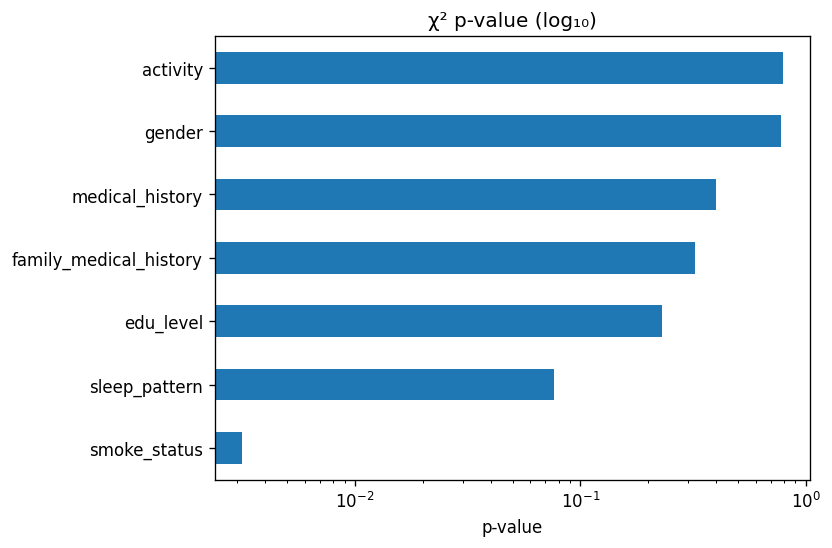

In [108]:
# ────────────────────────────────
# 셀 2 | 카이제곱 : 고스트레스(>0.75) vs 범주  p-value
# ────────────────────────────────
import scipy.stats as ss

high = (y > 0.75).astype(int)
chi = {}
for col in cat_cols2:
    tab = pd.crosstab(df_train[col], high)
    chi[col] = ss.chi2_contingency(tab, correction=False)[1]   # p-value
(pd.Series(chi).sort_values()
   .plot(kind="barh", title="χ² p-value (log₁₀)", logx=True))
plt.xlabel("p-value"); plt.show()


In [109]:
# ────────────────────────────────
# 셀 3 | 희소 카테고리 탐색 & 태그
#       - 빈도 <1% 는 “_rare” 로 태그 제안
# ────────────────────────────────
rare_map={}
for col in cat_cols2:
    freq = df_train[col].value_counts(normalize=True)
    rares = freq[freq < 0.01].index
    rare_map[col] = rares.tolist()
    print(f"{col:25s}  rare n={len(rares)}  → {rares.tolist()[:6]}")


gender                     rare n=0  → []
activity                   rare n=0  → []
smoke_status               rare n=0  → []
medical_history            rare n=0  → []
family_medical_history     rare n=0  → []
sleep_pattern              rare n=0  → []
edu_level                  rare n=0  → []


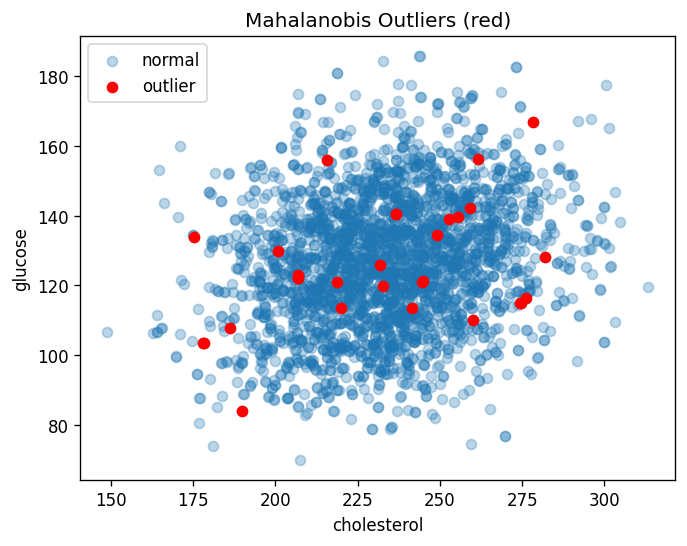

In [110]:
# ────────────────────────────────
# 셀 4 | Mahalanobis 거리 Outlier 탐지 (수치형)
#       - 가장 먼 1% 시각화
# ────────────────────────────────
from numpy.linalg import inv

X = X_num.to_numpy()
mu = X.mean(0)
Sinv = inv(np.cov(X, rowvar=False))
md = [np.sqrt((row-mu)@Sinv@(row-mu)) for row in X]
df_train["mahal"] = md
thr = np.percentile(md, 99)
out = df_train[df_train.mahal > thr]

plt.scatter(X_num["cholesterol"], X_num["glucose"], alpha=.3, label="normal")
plt.scatter(out["cholesterol"], out["glucose"], color="r", label="outlier")
plt.legend(); plt.xlabel("cholesterol"); plt.ylabel("glucose")
plt.title("Mahalanobis Outliers (red)"); plt.show()


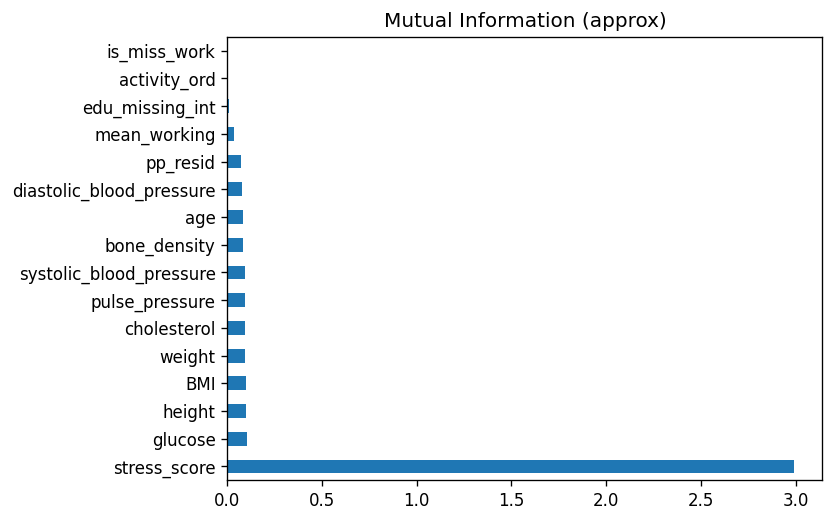

In [111]:
# ────────────────────────────────
# 셀 5 | 수치형 ↔ 타깃   상호정보량(MI) 수작업
#       - 균등빈 디스크리타이즈(k=20) 후 I(X;Y)
# ────────────────────────────────
import math, numpy as np

def mi_1d(x, y, k=20):
    xbin = pd.qcut(x, q=k, duplicates='drop').cat.codes
    ybin = pd.qcut(y, q=k, duplicates='drop').cat.codes
    n = len(x)
    mi = 0
    for xi in np.unique(xbin):
        for yi in np.unique(ybin):
            pxy = ((xbin == xi) & (ybin == yi)).sum() / n
            if pxy == 0: continue
            px  = (xbin == xi).mean()
            py  = (ybin == yi).mean()
            mi += pxy * math.log(pxy/(px*py)+1e-12)
    return mi

mi_vals = {c: mi_1d(X_num[c], y) for c in num_cols}
(pd.Series(mi_vals).sort_values(ascending=False)
   .plot(kind="barh", title="Mutual Information (approx)"))
plt.show()


추가 EDA6

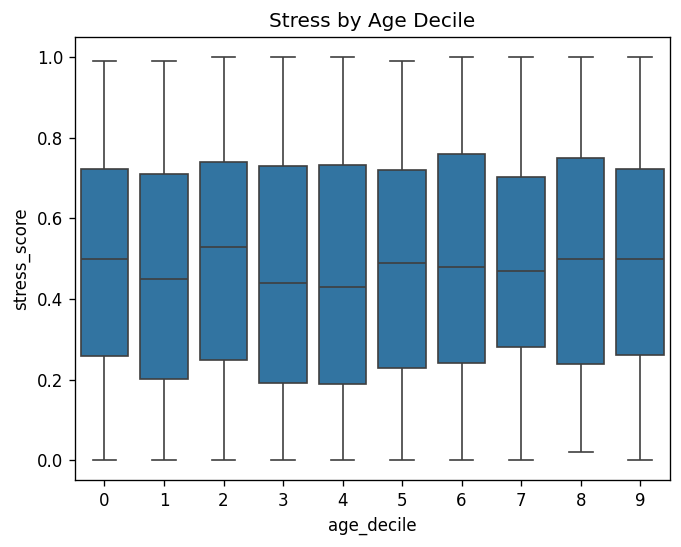

Kruskal p-value: 0.3283765886321419


In [113]:
# ────────────────────────────────
# 셀 1 | Age Decile ↔ Stress  (Kruskal-Wallis p)
# ────────────────────────────────
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import scipy.stats as ss

dec = pd.qcut(df_train["age"], q=10, labels=False)
df_train["age_decile"] = dec
sns.boxplot(x="age_decile", y="stress_score", data=df_train, showfliers=False)
plt.title("Stress by Age Decile"); plt.show()

# 비모수 다집단 비교
groups = [df_train.loc[dec == k, "stress_score"] for k in range(10)]
print("Kruskal p-value:", ss.kruskal(*groups).pvalue)


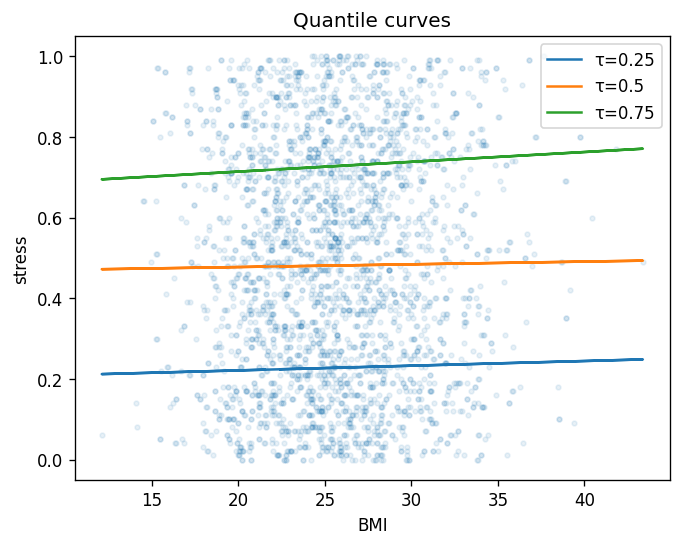

In [114]:
# ────────────────────────────────
# 셀 2 | BMI → Stress  0.25 / 0.50 / 0.75  Quantile 회귀곡선
# ────────────────────────────────
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

bmi = df_train["BMI"].values
Xq  = sm.add_constant(bmi)
qs  = [0.25, 0.50, 0.75]
for q in qs:
    mod = QuantReg(df_train["stress_score"], Xq).fit(q=q)
    df_train[f"q{int(q*100)}"] = mod.predict(Xq)

# 시각화
plt.scatter(bmi, df_train["stress_score"], alpha=.1, s=8)
for q in qs:
    plt.plot(bmi, df_train[f"q{int(q*100)}"], label=f"τ={q}")
plt.legend(); plt.xlabel("BMI"); plt.ylabel("stress"); plt.title("Quantile curves"); plt.show()


C:\Users\shaun\AppData\Local\Temp\ipykernel_21672\597935868.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot  = df_train.pivot_table(index=bins_c, columns=bins_g,


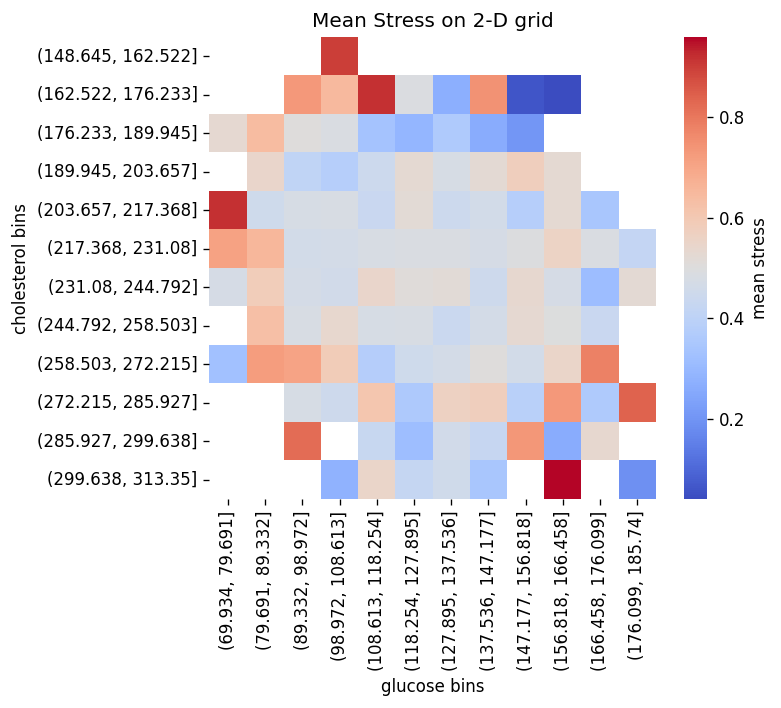

In [115]:
# ────────────────────────────────
# 셀 3 | 2-D 히트맵 : (Cholesterol, Glucose) 그리드별 평균 Stress
# ────────────────────────────────
bins_c = pd.cut(df_train["cholesterol"], 12)
bins_g = pd.cut(df_train["glucose"],      12)
pivot  = df_train.pivot_table(index=bins_c, columns=bins_g,
                              values="stress_score", aggfunc="mean")
plt.figure(figsize=(6,5))
sns.heatmap(pivot, cmap="coolwarm", cbar_kws={'label':'mean stress'})
plt.xlabel("glucose bins"); plt.ylabel("cholesterol bins")
plt.title("Mean Stress on 2-D grid"); plt.show()


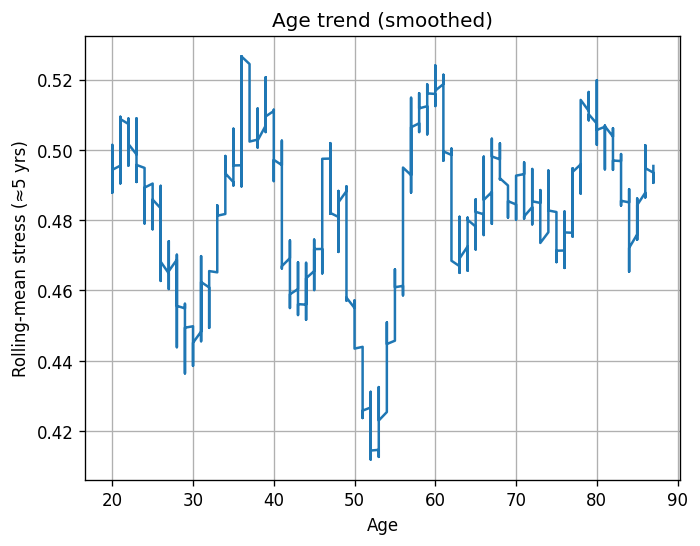

In [116]:
# ────────────────────────────────
# 셀 4 | Rolling Mean Stress by Age  (window = 5 yrs)
# ────────────────────────────────
df_tmp = df_train.sort_values("age")
roll   = df_tmp["stress_score"].rolling(window=200, center=True).mean()   # ≈5 yr
plt.plot(df_tmp["age"], roll)
plt.xlabel("Age"); plt.ylabel("Rolling-mean stress (≈5 yrs)")
plt.title("Age trend (smoothed)"); plt.grid(); plt.show()


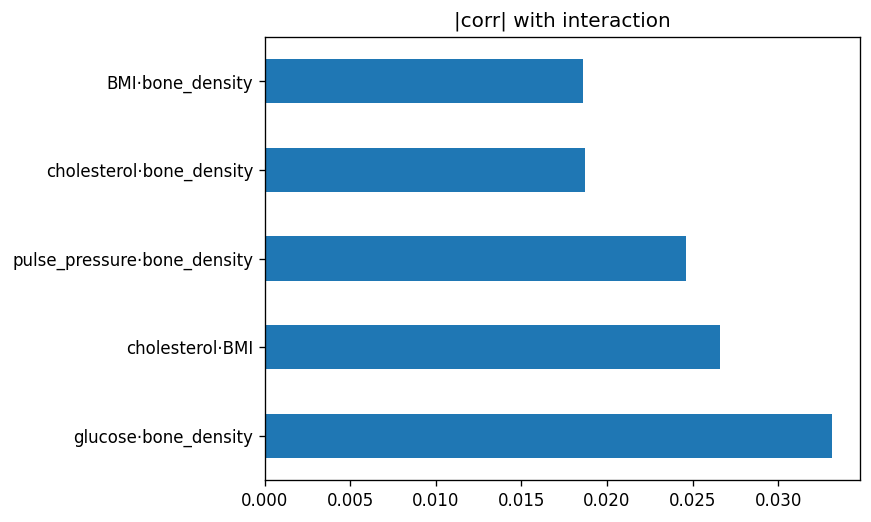

In [117]:
# ────────────────────────────────
# 셀 5 | 수치×수치 상호작용 → Stress 상관  TOP-5
#       (피어슨 |corr(stress, (xi·xj))|)
# ────────────────────────────────
import itertools

pairs, vals = [], []
for a, b in itertools.combinations(["cholesterol","glucose","BMI",
                                    "pulse_pressure","bone_density"], 2):
    prod = X_num[a] * X_num[b]
    r    = abs(np.corrcoef(prod, y)[0,1])
    pairs.append(f"{a}·{b}"); vals.append(r)

(pd.Series(vals, index=pairs)
   .sort_values(ascending=False)
   .head(5)
   .plot(kind="barh", title="|corr| with interaction"))
plt.show()


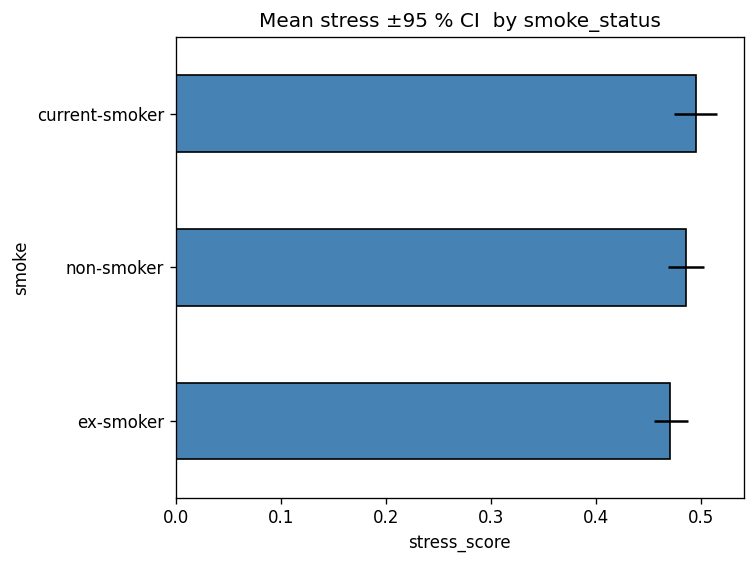

In [119]:
# ────────────────────────────────
# 셀 6 (수정) | Boot-strapped 95 % CI by smoke_status
# ────────────────────────────────
import numpy as np, pandas as pd, matplotlib.pyplot as plt

def boot_ci(series, B=2000, alpha=0.05):
    rng   = np.random.default_rng(0)
    boot  = [series.sample(frac=1, replace=True,
                           random_state=rng.integers(1e9)).mean()
             for _ in range(B)]
    lo, hi = np.percentile(boot, [100*alpha/2, 100*(1-alpha/2)])
    return series.mean(), lo, hi

rows = []
for lev in df_train["smoke_status"].unique():
    m, lo, hi = boot_ci(df_train.loc[df_train.smoke_status==lev, "stress_score"])
    rows.append((lev, m, lo, hi))

ci_df = (pd.DataFrame(rows, columns=["smoke","mean","lo","hi"])
           .set_index("smoke")
           .sort_values("mean"))

# 좌·우 오차(2×N) 생성
err = np.vstack([ci_df["mean"] - ci_df["lo"],
                 ci_df["hi"]  - ci_df["mean"]])

ci_df["mean"].plot(kind="barh", xerr=err, legend=False,
                   title="Mean stress ±95 % CI  by smoke_status",
                   color="steelblue", edgecolor="black")
plt.xlabel("stress_score")
plt.tight_layout()
plt.show()
